
### 1. **Cargar y binarizar la imagen**
   - Usa `cv2.imread()` para cargar la imagen.
   - Convierte la imagen a escala de grises usando `cv2.cvtColor()`.
   - Aplica un umbral binario con `cv2.threshold()` para obtener una imagen en blanco y negro.

   **Documentación útil**:
   - [cv2.imread()](https://docs.opencv.org/4.x/d4/da8/group__imgcodecs.html#ga3a7d3c3de4d6e7f08a96e2a6169a9e51)
   - [cv2.cvtColor()](https://docs.opencv.org/4.x/d8/d01/group__imgproc__color__conversions.html#ga8d24c64d340bb4973a479e62c147f390)
   - [cv2.threshold()](https://docs.opencv.org/4.x/d7/d1b/group__imgproc__misc.html#ga8d3b7f26363a6ec60f0ef1a5ef151dcf)

---

### 2. **Crear la malla**
   - Divide la imagen en una cuadrícula utilizando las dimensiones especificadas.
   - Usa bucles `for` para recorrer cada celda de la malla.
   - Para cada celda:
     - Extrae el submatriz de píxeles (ventana de la malla) usando slicing en matrices de Numpy.
     - Calcula la cantidad de píxeles negros/blancos.

   **Documentación útil**:
   - [Acceso por slicing en Numpy](https://numpy.org/doc/stable/user/basics.indexing.html)

---

### 3. **Clasificar cada celda como negra o blanca**
   - Calcula el promedio de intensidad de los píxeles dentro de la celda.
   - Si el promedio está por debajo del umbral, clasifícalo como negro.
   - Si no, clasifícalo como blanco.
   - Considera toda celda como negra si tiene alguna porción negra para garantizar tu regla de "mitad-negra-es-negra".

---

### 4. **Sumar áreas negras**
   - Multiplica la cantidad de celdas negras por el área de una celda.
   - El área de una celda será proporcional al tamaño de la malla y a las dimensiones originales de la imagen.

   Fórmula:
   \[
   \text{Área total negra} = \text{Celdas negras} \times \text{Área de una celda}
   \]

---

### 5. **Permitir modificar el tamaño de la malla**
   - Integra un parámetro para definir la densidad de la malla (número de celdas en el eje X e Y).
   - Calcula el tamaño de cada celda en píxeles como:
     \[
     \text{Tamaño de celda (en píxeles)} = \frac{\text{Tamaño de la imagen}}{\text{Número de celdas}}
     \]

   **Documentación útil**:
   - [cv2.resize()](https://docs.opencv.org/4.x/da/d6e/tutorial_py_geometric_transformations.html) (para ajustar la imagen si lo necesitas).

---

### 6. **Visualizar la malla**
   - Dibuja líneas sobre la imagen para representar la malla usando `cv2.line()`.

   **Documentación útil**:
   - [cv2.line()](https://docs.opencv.org/4.x/d6/d6e/group__imgproc__draw.html#gaf78d467e20713ecc10d4437f8b0f2ee4)

---

### 7. **Optimización y pruebas**
   - Genera varios tamaños de malla y compara los resultados de las áreas calculadas.
   - Puedes guardar los resultados o visualizarlos en gráficos para analizar la convergencia de la precisión del área.

In [1]:
%pip install opencv-contrib-python

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

## Binarizar la imagen


In [2]:
imagen = cv2.imread('mancha_coloreada.png', cv2.IMREAD_GRAYSCALE) #en tonalidad de grises (2, blanco y negro)

imagen.shape


(1759, 1660)

In [3]:
# imagen = cv2.resize(imagen, (800, 600))  #cambia la resolucion pq si es mu grande no la procesa bien/tarda much0
# imagen.shape
# se deforma la imagen xd porque no son proporciones iguales que als de la original-> pendiente de mirar

(600, 800)

In [3]:
_, imagen_binarizada = cv2.threshold(imagen, 127, 255, cv2.THRESH_BINARY)

In [4]:
cv2.threshold(imagen, 127, 255, cv2.THRESH_BINARY)

(127.0,
 array([[255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        ...,
        [255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255]], dtype=uint8))

In [5]:
# import time
# start = time.time()
# imagen = cv2.imread('mancha_coloreada.png', cv2.IMREAD_GRAYSCALE)
# print(f"Carga de imagen: {time.time() - start:.2f} segundos")

# start = time.time()
# _, imagen_binarizada = cv2.threshold(imagen, 127, 255, cv2.THRESH_BINARY)
# print(f"Binarización: {time.time() - start:.2f} segundos")

In [5]:
cv2.imwrite('imagen_binarizada.png', imagen_binarizada) #guardar la imagen binarizada

True

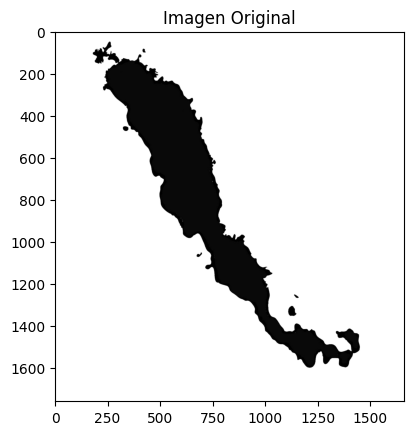

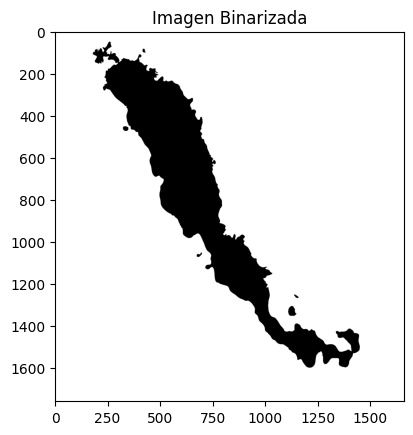

In [6]:
# Mostrar la imagen original
plt.imshow(imagen, cmap='gray')
plt.title('Imagen Original')
plt.show()

# Mostrar la imagen binarizada
plt.imshow(imagen_binarizada, cmap='gray')
plt.title('Imagen Binarizada')
plt.show()


## Crear al malla

In [ ]:
# OpenCV utiliza por defecto para representar imagenes en color BGR 
# En RGB: (255, 0, 0) es rojo.
# En BGR: (255, 0, 0) es azul

In [7]:
imagen_con_malla = cv2.cvtColor(imagen_binarizada, cv2.COLOR_GRAY2BGR)
# cv2.cvtColor() se utiliza para transformar una imagen de un espacio de color a otro.
# en este caso cambia de grises al gbr
# las imagenes en escala de grises solo permiten intensidades de gris de 0 a 255
imagen_con_malla

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

In [8]:
imagen_con_malla.shape#(alto (eje y), ancho (eje x), numero de valors de color por pixel(3 pro el gbr))

(1759, 1660, 3)

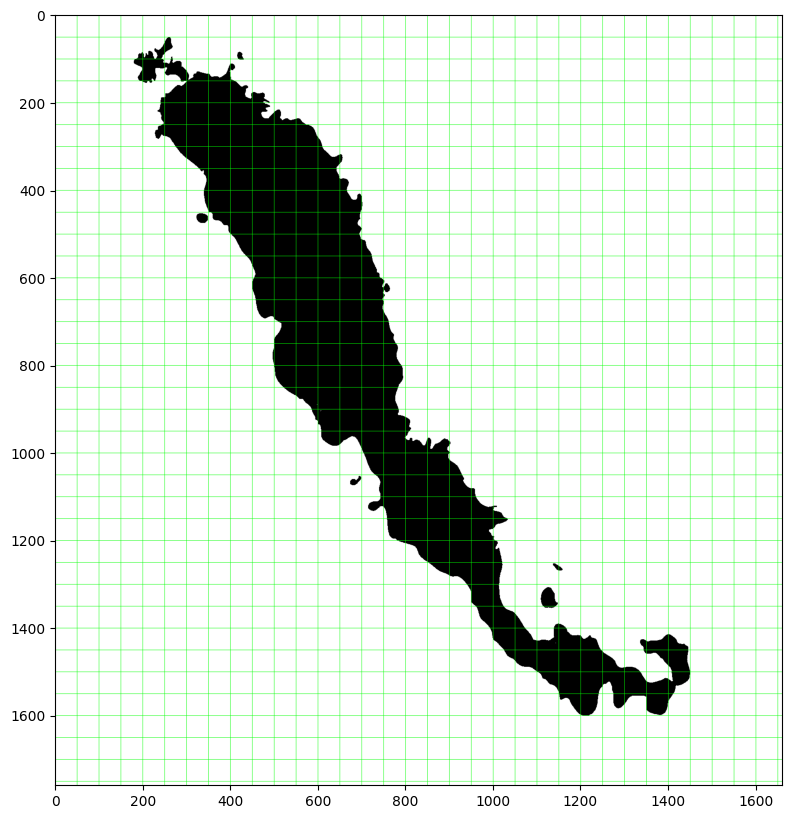

In [9]:
paso = 50

# Crear una copia de la imagen binarizada para superponer la malla
imagen_con_malla = cv2.cvtColor(imagen_binarizada, cv2.COLOR_GRAY2BGR)

# Dimensiones de la imagen
alto, ancho = imagen_con_malla.shape[:2]

# Dibujar líneas verticales
for x in range(0, ancho, paso):
    cv2.line(imagen_con_malla, (x, 0), (x, alto), (0, 255, 0), 1)

# Dibujar líneas horizontales
for y in range(0, alto, paso):
    cv2.line(imagen_con_malla, (0, y), (ancho, y), (0, 255, 0), 1)

# Convertir BGR a RGB para Matplotlib
imagen_con_malla_rgb = cv2.cvtColor(imagen_con_malla, cv2.COLOR_BGR2RGB)

#en un noteboook tienes que plotear las cosas pq sino no se muestrasn por pantalla llamando a los metodos de cv2
plt.figure(figsize=(10, 10))
plt.imshow(imagen_con_malla_rgb)
plt.show()

In [28]:
negro_celdas = 0  # Contador de celdas negras

for y in range(0, alto, paso):
    for x in range(0, ancho, paso):
        # Extraer la submatriz de la celda
        celda = imagen_binarizada[y:y+paso, x:x+paso]
        
        # Verificar si hay píxeles negros
        if np.any(celda == 0):  # Si al menos un píxel es negro
            negro_celdas += 1

print(f"Celdas negras: {negro_celdas}")


Celdas negras: 212


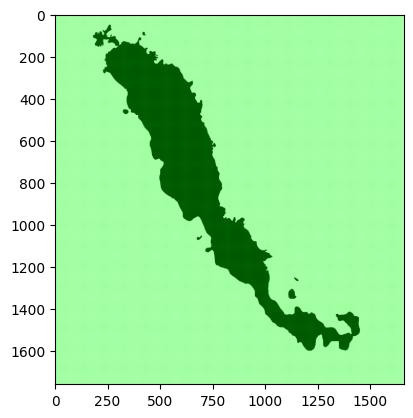

In [10]:
def visualize_equis_mesh(binarized_image, h:int):

    '''
    parameters:
    - h -> int, the size of the mesh you wanna build in pixels
    - binarized_image -> numpy.ndarray, the image you wanna overlay the mesh on

    output:
    - numpy.ndarray, thee image with the mesh overlay in RGB format, suitable for matplotlib plotting

    notes:
    - the mesh is drawn with green lines (color code: (0, 255, 0)).
    '''

    mesh_image = cv2.cvtColor(binarized_image, cv2.COLOR_GRAY2BGR)

    height, width = mesh_image.shape[:2] # shape -> (height, width, channerls)

    for x in range(0, width, h):
        cv2.line(mesh_image, (x, 0), (x, height), (0, 255, 0), 1)
        # parameter:(image, initial point, final point, color, size of the line: 1 pixel)

    for y in range(0, height, h):
        cv2.line(mesh_image, (0, y), (width, y), (0, 255, 0), 1)
    
    mesh_image_rgb = cv2.cvtColor(mesh_image, cv2.COLOR_BGR2RGB) #covert the image to rgb for matpl

    return mesh_image_rgb

image = cv2.imread('mancha_coloreada.png', cv2.IMREAD_GRAYSCALE)
_, bin_image = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY)
#cv2.imwrite('bin_image.png', imagen_binarizada) 

image_to_plot = visualize_equis_mesh(bin_image, 5)
plt.imshow(image_to_plot)
plt.show()


In [11]:
def count_any_black_cells(image, h: int): # upper bound
    '''
    parameter:
    - h -> cell size in pixels, width and height of the grid squares
    - image : numpy.ndarray, The binarized image to analyze (pixels = 0 or 255)

    output:
    - int tthe number of cells that contain at least one black pixel (value 0)

    notes:
    - if the cell contains at least 1 black pixel it is consider black
    - the grid is formed by dividing the image into equispaced cells of size hxh
    '''
    black_cells = 0
    height, width = image.shape

    for y in range(0, height, h):
        for x in range(0, width, h):
            cell = image[y:y+h, x:x+h] # extrar the submatrix that corresponds to that cell

            if np.any(cell == 0): #check if any pixel is black
                black_cells += 1

    return black_cells
    
black_cells_count = count_any_black_cells(bin_image, 20)
black_cells_count

1091

In [12]:
def count_all_black_cells(image, h: int): #lowe bound
    '''
    parameter:
    - h -> cell size in pixels, width and height of the grid squares
    - image : numpy.ndarray, The binarized image to analyze (pixels = 0 or 255)

    output:
    - int tthe number of cells that contain at least one black pixel (value 0)

    notes:
    - if if all its pixels are black, it is consider black
    - the grid is formed by dividing the image into equispaced cells of size hxh
    '''
    black_cells = 0
    height, width = image.shape

    for y in range(0, height, h):
        for x in range(0, width, h):
            cell = image[y:y+h, x:x+h] # extrar the submatrix that corresponds to that cell

            if np.all(cell == 0): #check if all pixel is black
                black_cells += 1

    return black_cells
    
black_cells_count = count_all_black_cells(bin_image, 20)
black_cells_count

721

In [14]:
def count_white_cells(image, h: int):
    """
    parameters:
    - h -> cell size in pixels, width and height of the grid squares
    - image : numpy.ndarray, The binarized image to analyze (pixels = 0 or 255)

    output:
    - int the number of cells that contain at least one white pixel (value 255)

    notes:
    - a cell is considered white if all its pixels are white
    - the grid is formed by dividing the image into equispaced cells of size hxh
    """
    white_cells = 0
    height, width = image.shape

    for y in range(0, height, h):
        for x in range(0, width, h):
            cell = image[y:y+h, x:x+h]

            if np.all(cell == 255):
                white_cells += 1

    return white_cells

white_cells_count = count_white_cells(bin_image, 20)
white_cells_count

6213

In [15]:
def area(number_of_cells: int, h: int):
    """
    returns the total area of a set of cells.

    notes:
    - tthe area of a single cell is h * h 
    - yotal area is the number of cells multiplied by the area of one cell
    """
    cell_area = h * h

    total_area = number_of_cells * cell_area

    return total_area

black_cells_area = area(black_cells_count, 20)
white_cells_area = area(white_cells_count, 20)
print(black_cells_area)
print(white_cells_area)


288400
2485200


For h = 50:
upper bound : 212 cells, area = 530000 pixels^2
lower bound : 77 cells, area = 192500 pixels^2


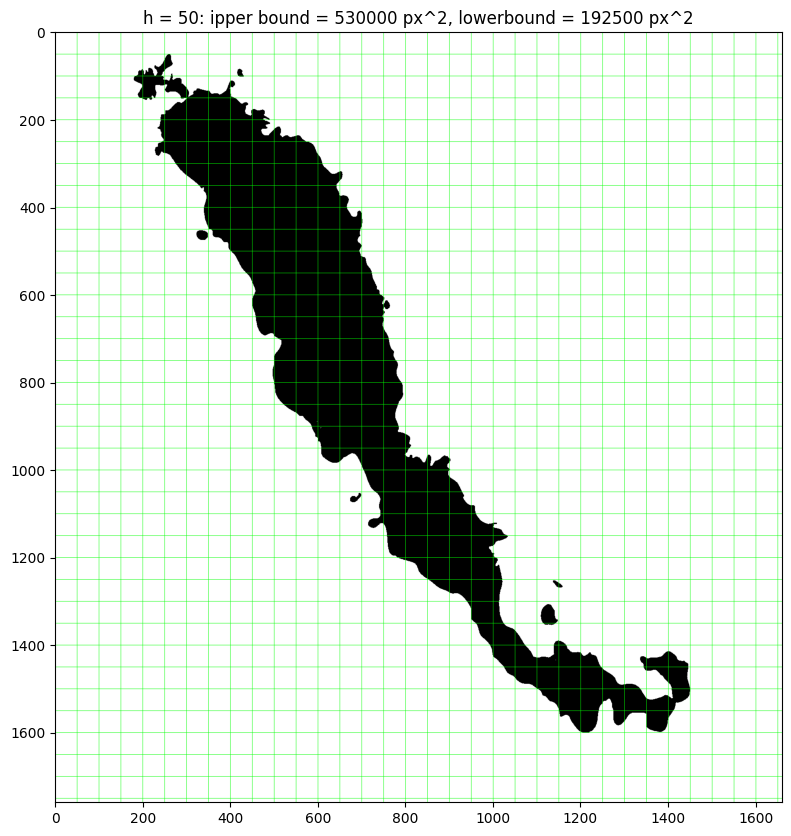

For h = 25:
upper bound : 719 cells, area = 449375 pixels^2
lower bound : 429 cells, area = 268125 pixels^2


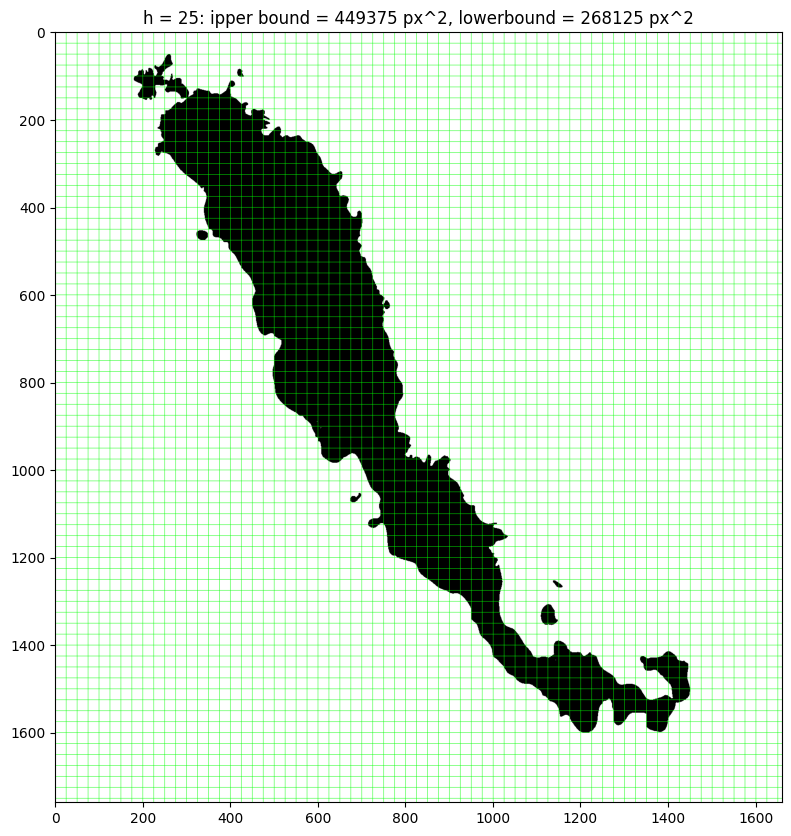

For h = 10:
upper bound : 3966 cells, area = 396600 pixels^2
lower bound : 3218 cells, area = 321800 pixels^2


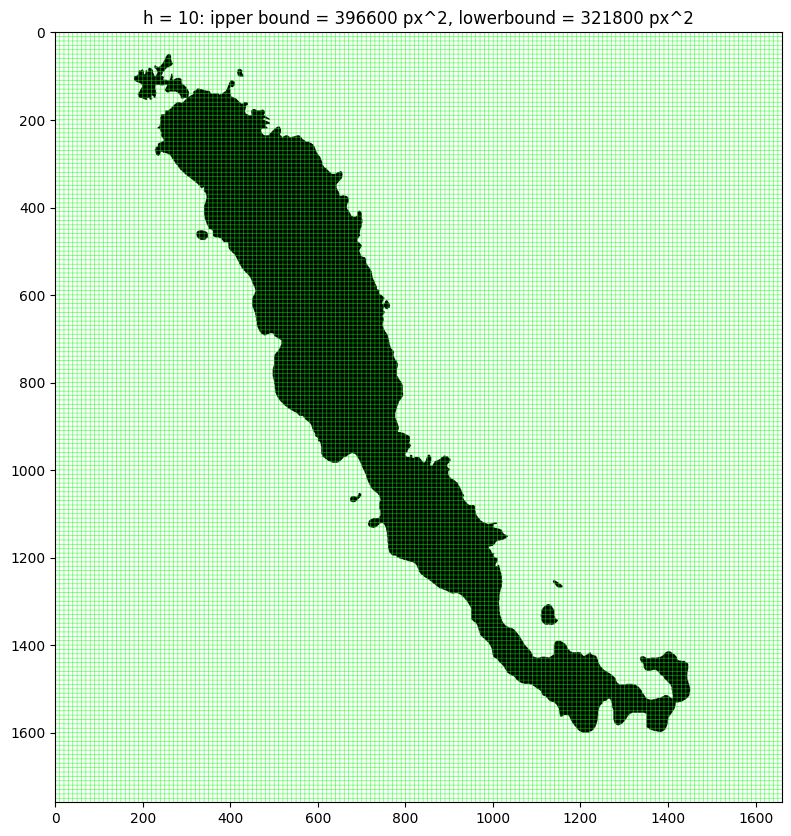

For h = 5:
upper bound : 15030 cells, area = 375750 pixels^2
lower bound : 13685 cells, area = 342125 pixels^2


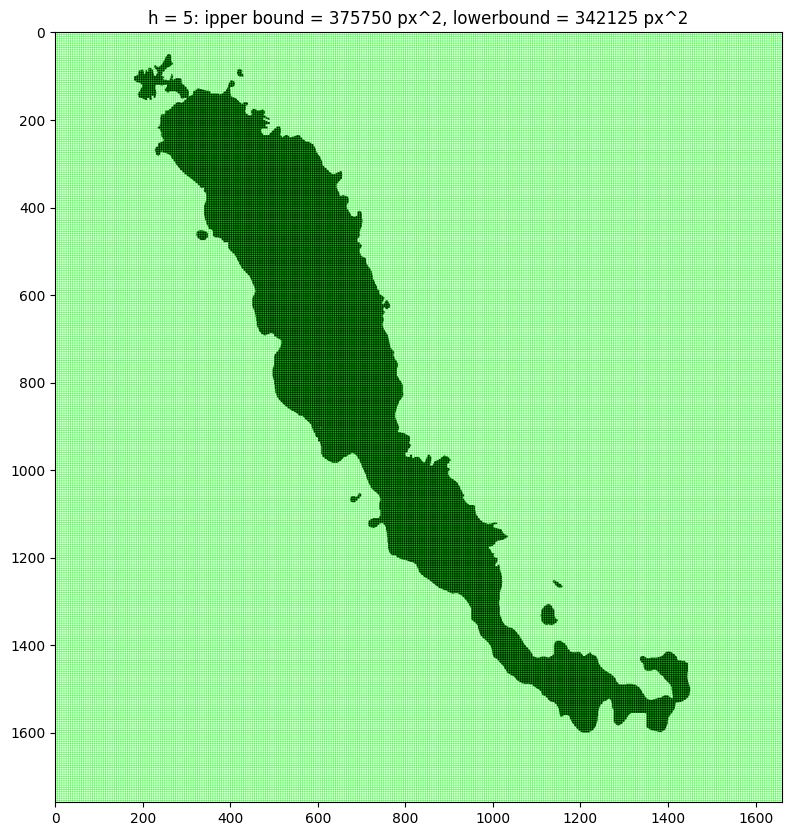

For h = 1:
upper bound : 359154 cells, area = 359154 pixels^2
lower bound : 359154 cells, area = 359154 pixels^2


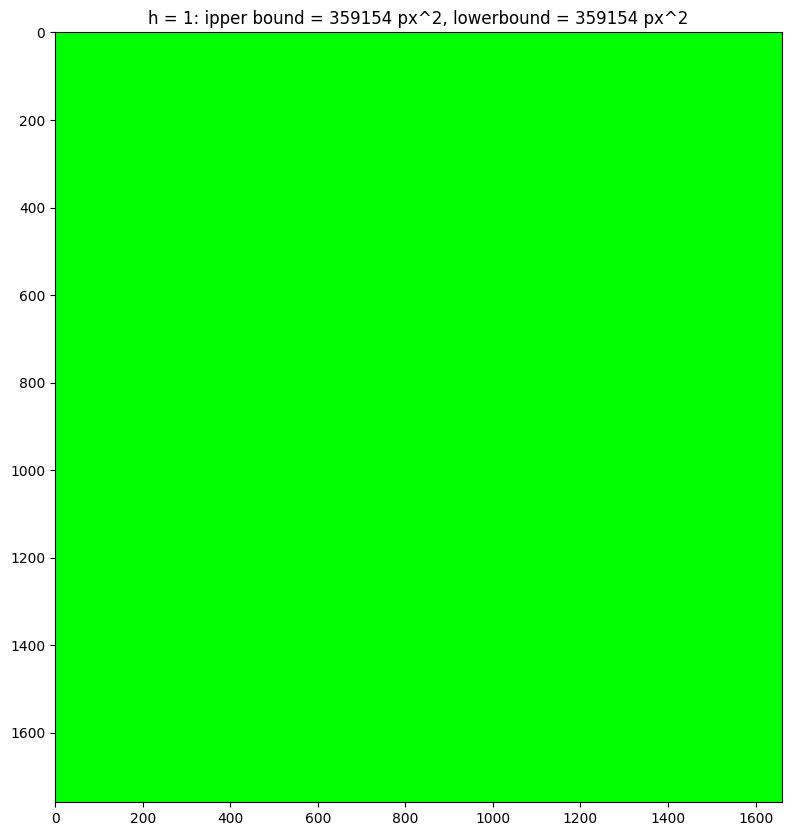

h = 0.5 (invalid cell size for pixels, skip)


In [52]:
image = cv2.imread('mancha_coloreada.png', cv2.IMREAD_GRAYSCALE)
_, bin_image = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY)
bin_image = bin_image.astype('uint8')


h_values = [50, 25, 10, 5, 1, 0.5]

for h in h_values:
    if h < 1:
        print(f"h = {h} (invalid cell size for pixels, skip)")
        continue
    
    any_black_cells_count = count_any_black_cells(bin_image, h)
    any_black_cells_area = area(any_black_cells_count, h)
    
    all_black_cells_count = count_all_black_cells(bin_image, h)
    all_black_cells_area = area(all_black_cells_count, h)
    
    image_with_mesh = visualize_equis_mesh(bin_image, int(h))
    
    print(f"For h = {h}:")
    print(f"upper bound : {any_black_cells_count} cells, area = {any_black_cells_area} pixels^2")
    print(f"lower bound : {all_black_cells_count} cells, area = {all_black_cells_area} pixels^2")
    
    plt.figure(figsize=(10, 10))
    plt.imshow(image_with_mesh)
    plt.title(f"h = {h}: ipper bound = {any_black_cells_area} px^2, lowerbound = {all_black_cells_area} px^2")
    plt.show()


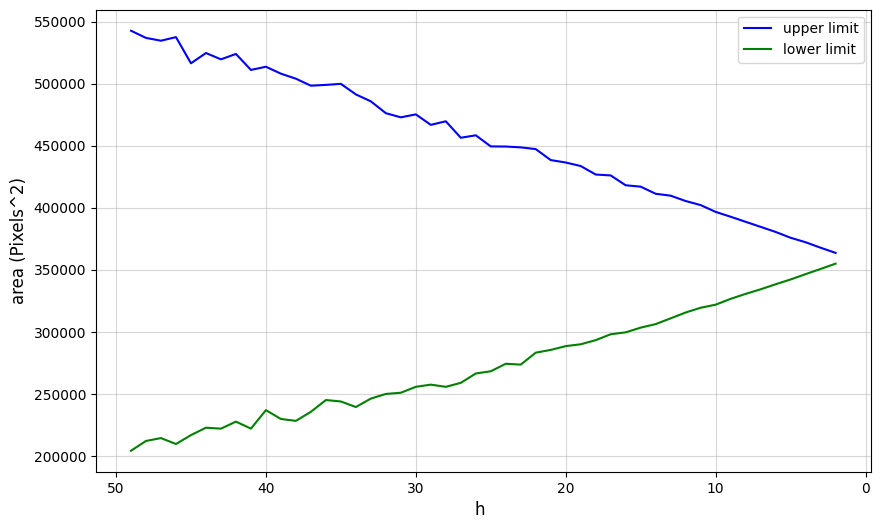

In [59]:
h_values_limit = list(range(2, 50))  
upper_areas = []  
lower_areas = []  

for h in h_values_limit:
    upper_cells = count_any_black_cells(bin_image, h)
    upper_area = area(upper_cells, h)
    upper_areas.append(upper_area)

    lower_cells = count_all_black_cells(bin_image, h)
    lower_area = area(lower_cells, h)
    lower_areas.append(lower_area)


plt.figure(figsize=(10, 6))

# upper bound graph
plt.plot(h_values_limit, upper_areas, label='upper limit', linestyle='-', color='blue')

# lower bound
plt.plot(h_values_limit, lower_areas, label='lower limit', linestyle='-', color='green')

# Invertir el eje X
plt.gca().invert_xaxis()


plt.xlabel('h ', fontsize=12)
plt.ylabel('area (Pixels^2)', fontsize=12)
plt.legend()
plt.grid(alpha=0.5)
plt.show()


In [70]:
def recursive_pixel(image, x, y):
    """
    input:
    image ->  numpy.ndarray, 255 representes white, the outsite pixel
    x ->  int, x coord of the current pixel
    y ->  int, y coord of the current pixel
    
    output:
    thee number of external white pixels connected to the starting pixel.
    """
    if x < 0 or x >= image.shape[1] or y < 0 or y >= image.shape[0]:
        return 0


    if image[y, x] != 255: # hay q aplicarle un random para que busque otro pixel aleatorio y compruebe si es blancp
        return 0

    image[y, x] = 128 #chage the pixel color to blue(128) to mark it as visited

    count = 1

    count += recursive_pixel(image, x + 1, y)  # R
    count += recursive_pixel(image, x - 1, y)  # L
    count += recursive_pixel(image, x, y + 1)  # U
    count += recursive_pixel(image, x, y - 1)  # D

    return count


def is_inside_area(binary_image):
    """
    input:
    binary_imagen -> numpy.ndarray

    output:
    returns the area of black pixels in a binary image by subtracting the external white pixels
    from the total pixels.   
    """
    height, width = binary_image.shape

    processed_image = binary_image.copy() #to not chage pixel colors in the originla

    # Contador de píxeles blancos externos
    external_white_pixels = 0

    #start recursive func in edges asuming they will be white
    for x in range(width):
        external_white_pixels += recursive_pixel(processed_image, x, 0)       # upper
        external_white_pixels += recursive_pixel(processed_image, x, height - 1)  # lower
    for y in range(height):
        external_white_pixels += recursive_pixel(processed_image, 0, y)       # left
        external_white_pixels += recursive_pixel(processed_image, width - 1, y)  # right


    total_pixels = height * width
    black_pixels_area = total_pixels - external_white_pixels

    return black_pixels_area


In [ ]:
image = cv2.imread('mancha_coloreada.png', cv2.IMREAD_GRAYSCALE)
_, binary_image = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY)

black_area = is_inside_area(binary_image)
print(f"the area of black pixels is: {black_area} pixels^2") #exceede el rango de python de recursividad xd

RecursionError: maximum recursion depth exceeded

In [17]:
def number_pixels(image):
    """
    returns the number of white and black pixels in the image
    """
    white_cells = 0
    black_cells = 0

    for y in range(imagen.shape[0]):  # fials
        for x in range(imagen.shape[1]):  #columans
            pixel = imagen[y, x]

            if pixel == 255:
                white_cells += 1
            elif pixel == 0:
                black_cells +=1

    return white_cells, black_cells

number_pixels(bin_image)

(2543502, 38082)

### pillow 




In [18]:
%pip install pillow


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [20]:
!python.exe -m pip install --upgrade pip

  Using cached pip-24.3.1-py3-none-any.whl.metadata (3.7 kB)
Using cached pip-24.3.1-py3-none-any.whl (1.8 MB)
  Attempting uninstall: pip
    Found existing installation: pip 24.2
    Uninstalling pip-24.2:
      Successfully uninstalled pip-24.2


In [42]:
from PIL import Image
from IPython.display import display
from PIL import ImageDraw



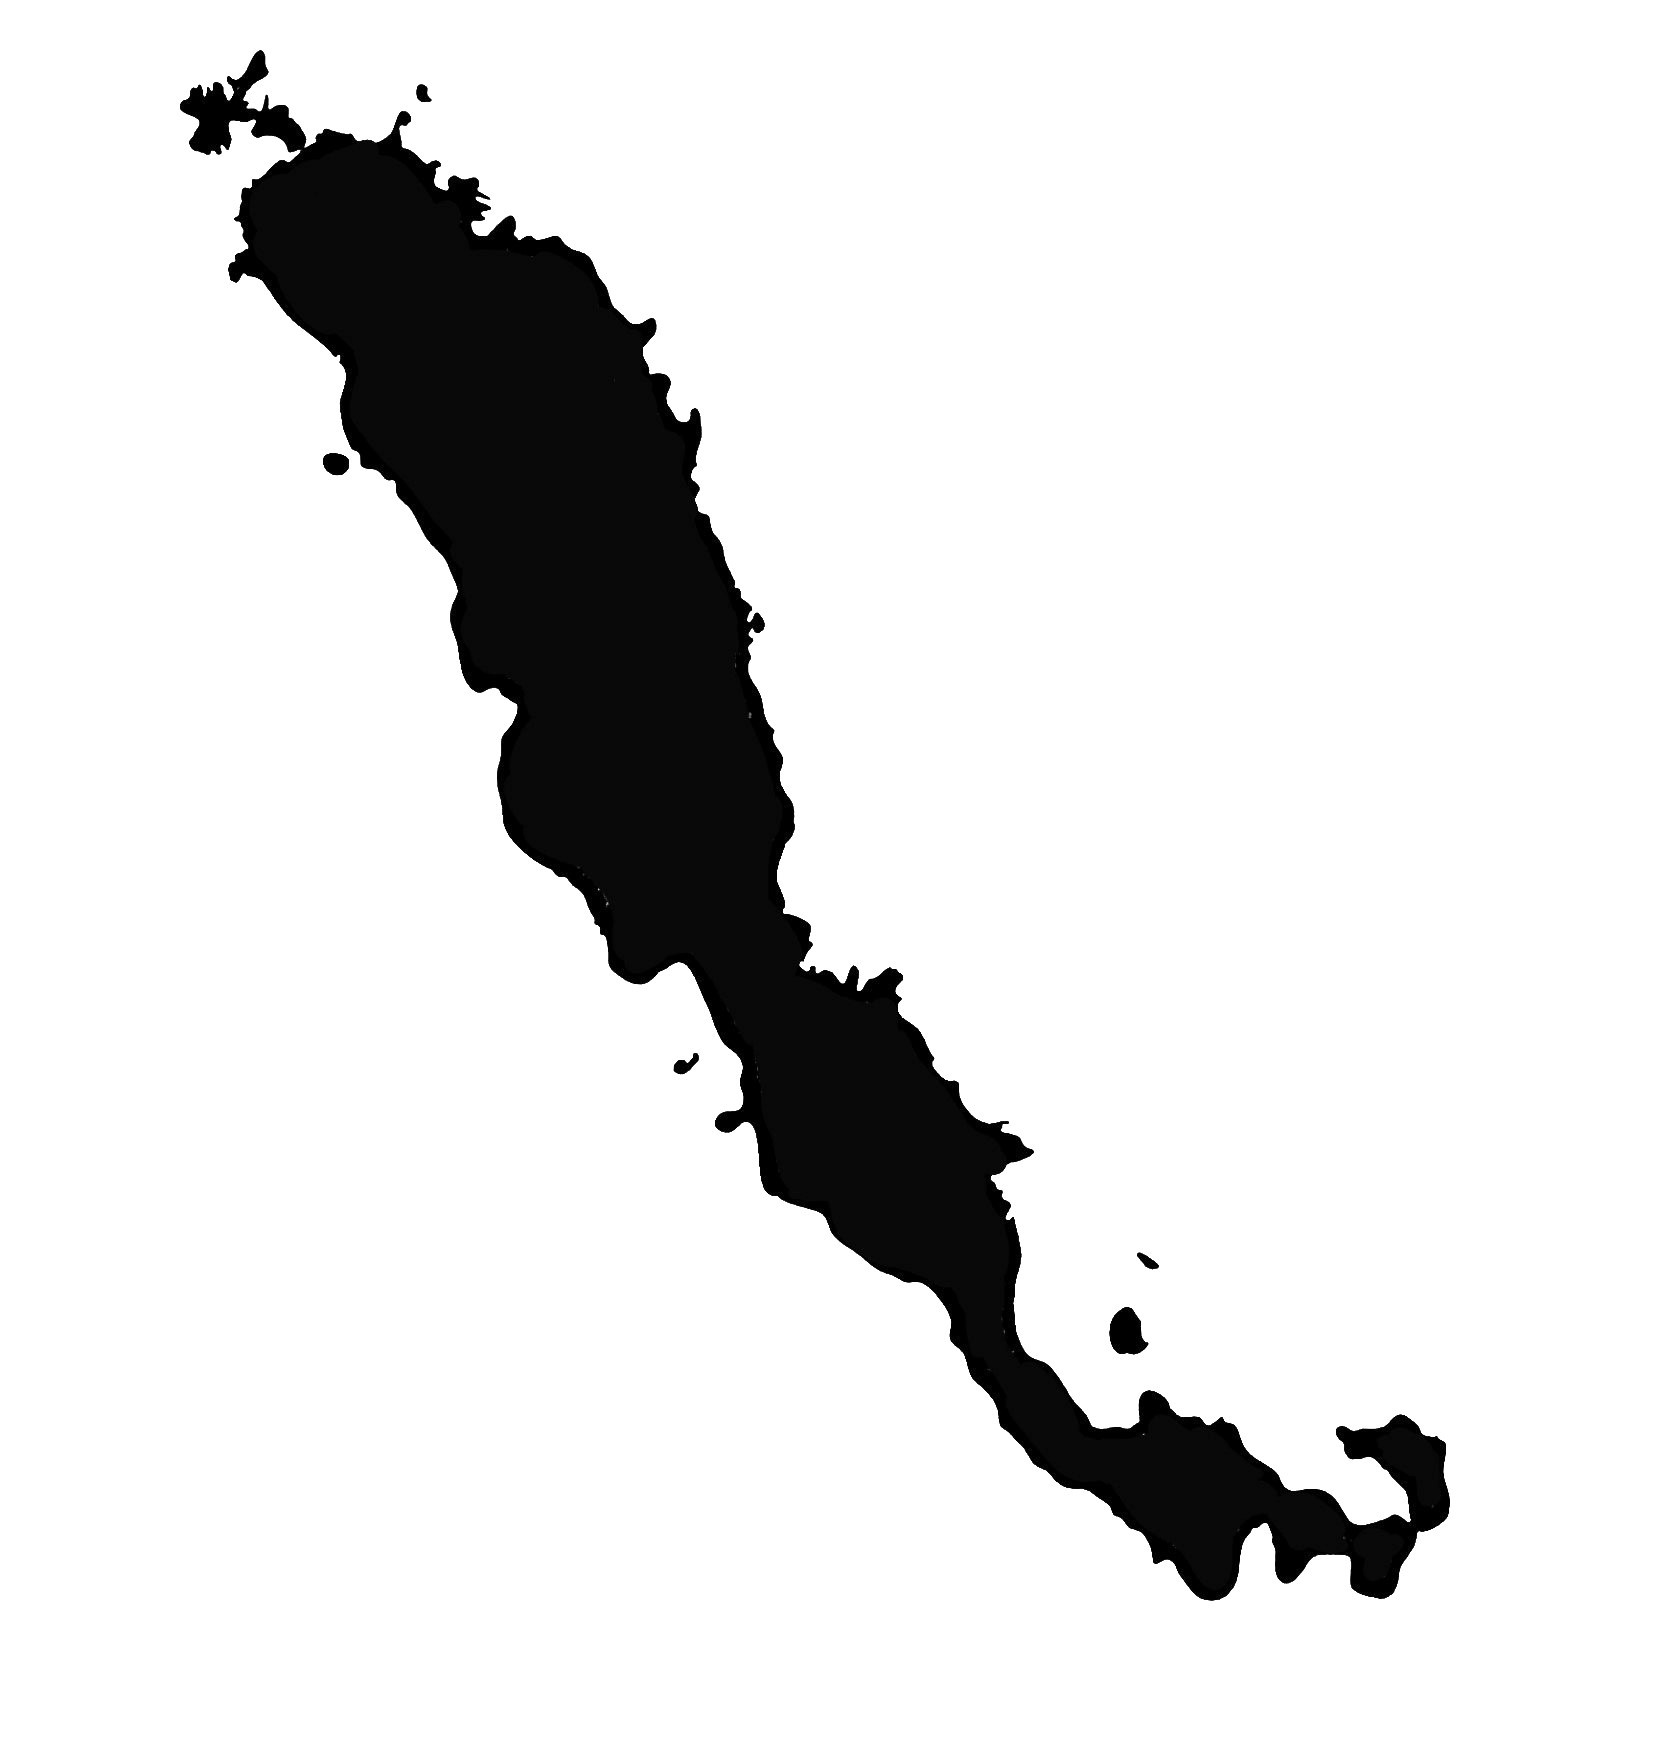

In [43]:
image = Image.open("mancha_coloreada.png")
display(image)

In [44]:
print(image.format)  
print(image.size)   
print(image.mode) # RGBA, A, alpha, canal transparencia del pixel


PNG
(1660, 1759)
RGBA


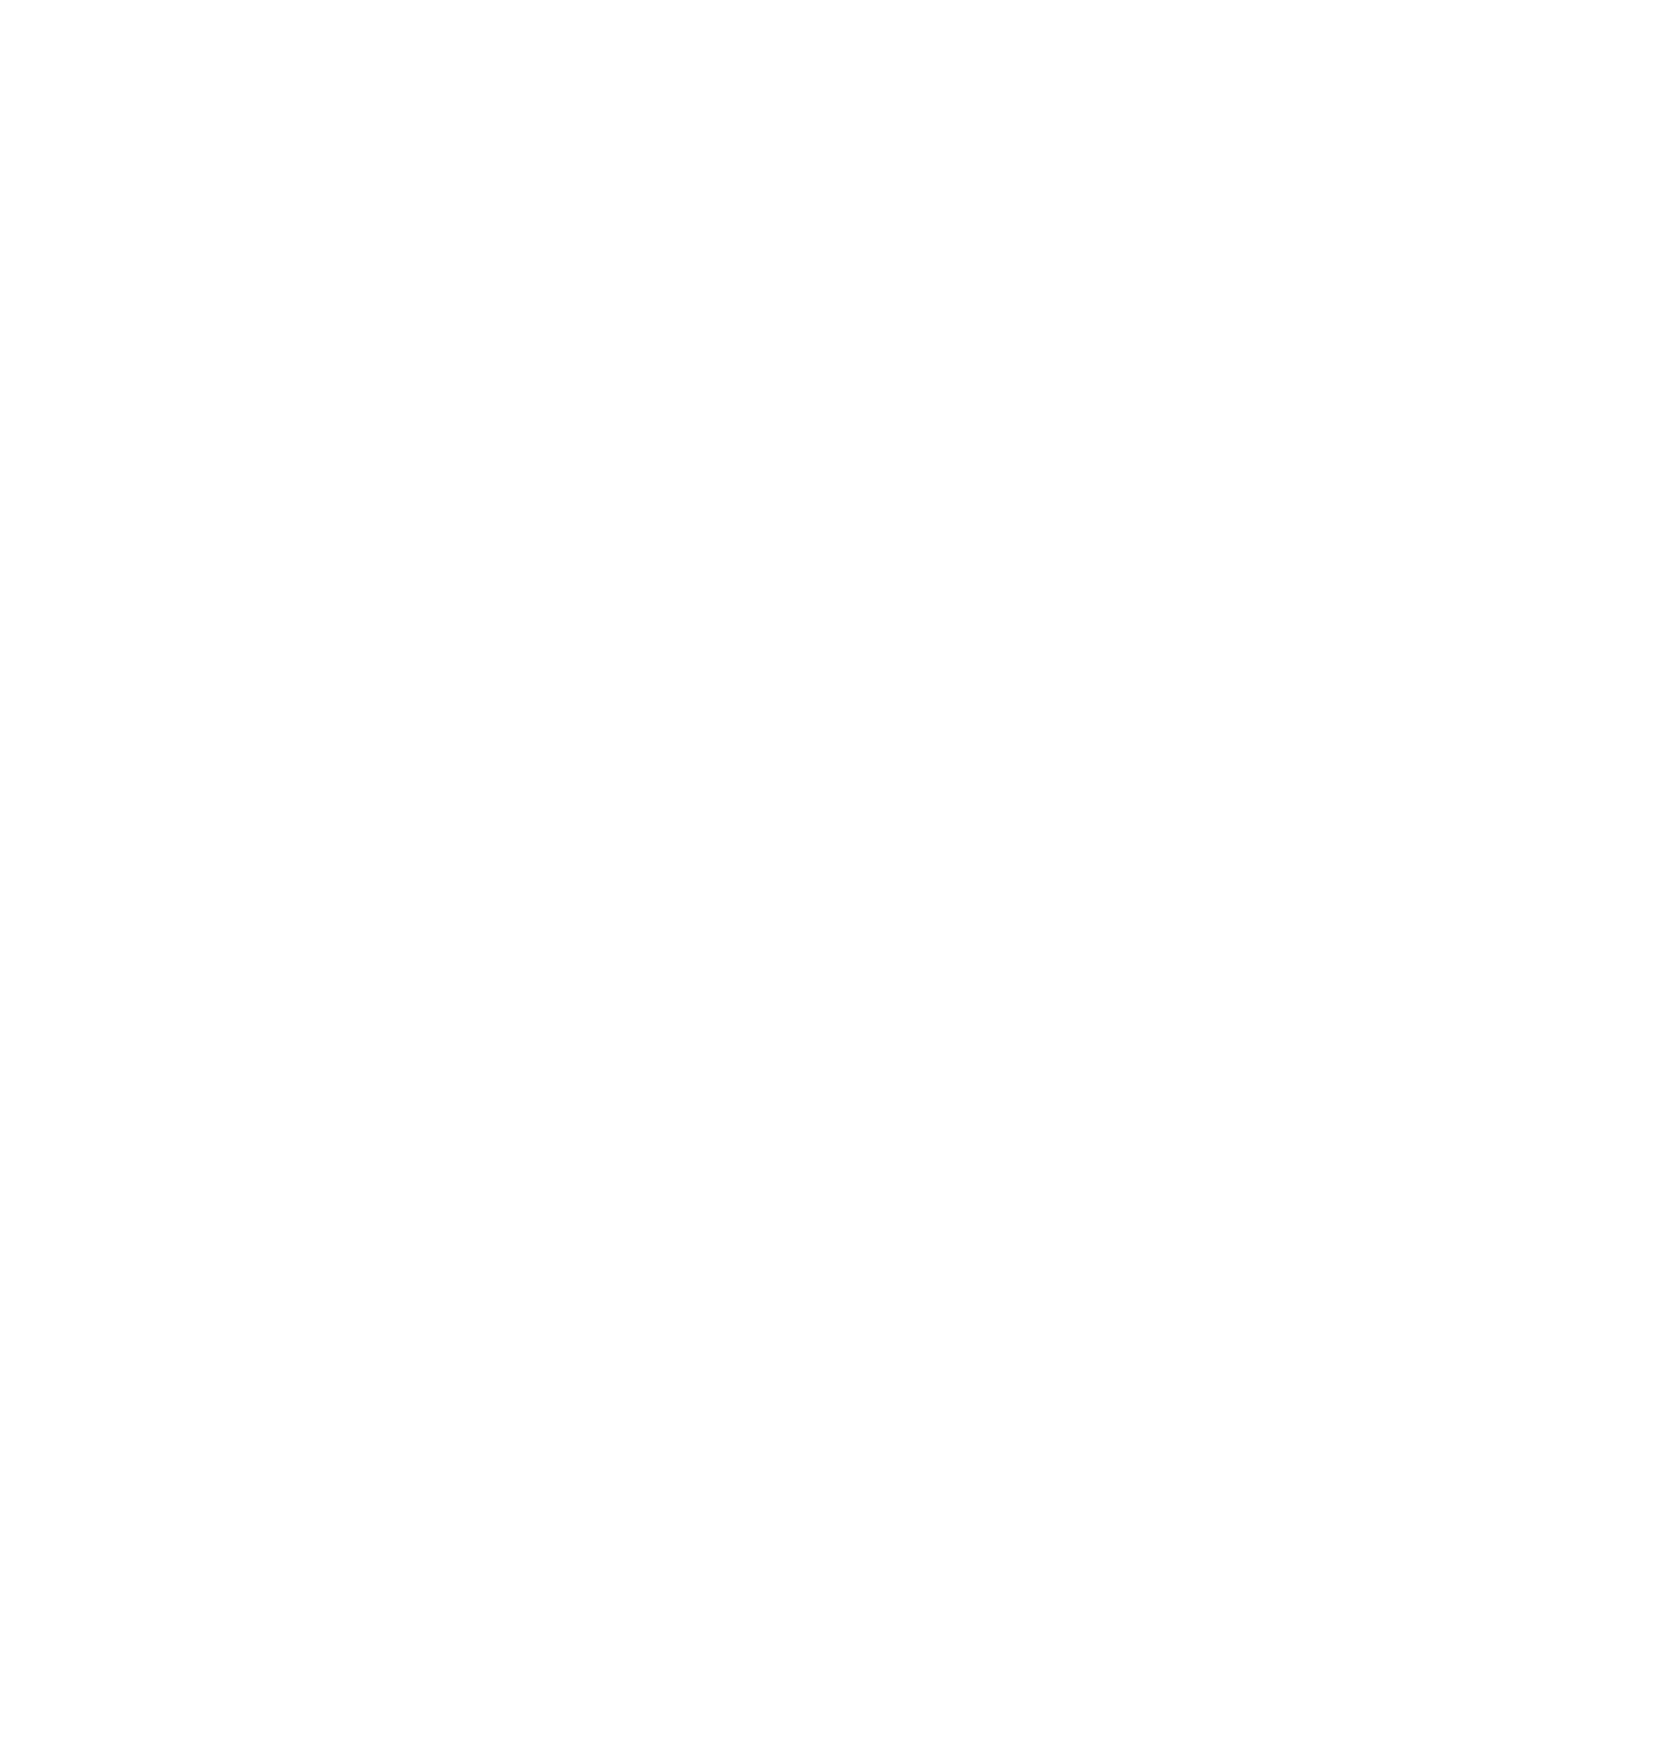

In [46]:
alpha = image.getchannel("A")  #extrae el canal alfa
display(alpha)


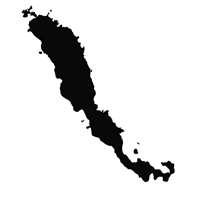

In [47]:
resized_image = image.resize((200, 200))
display(resized_image)


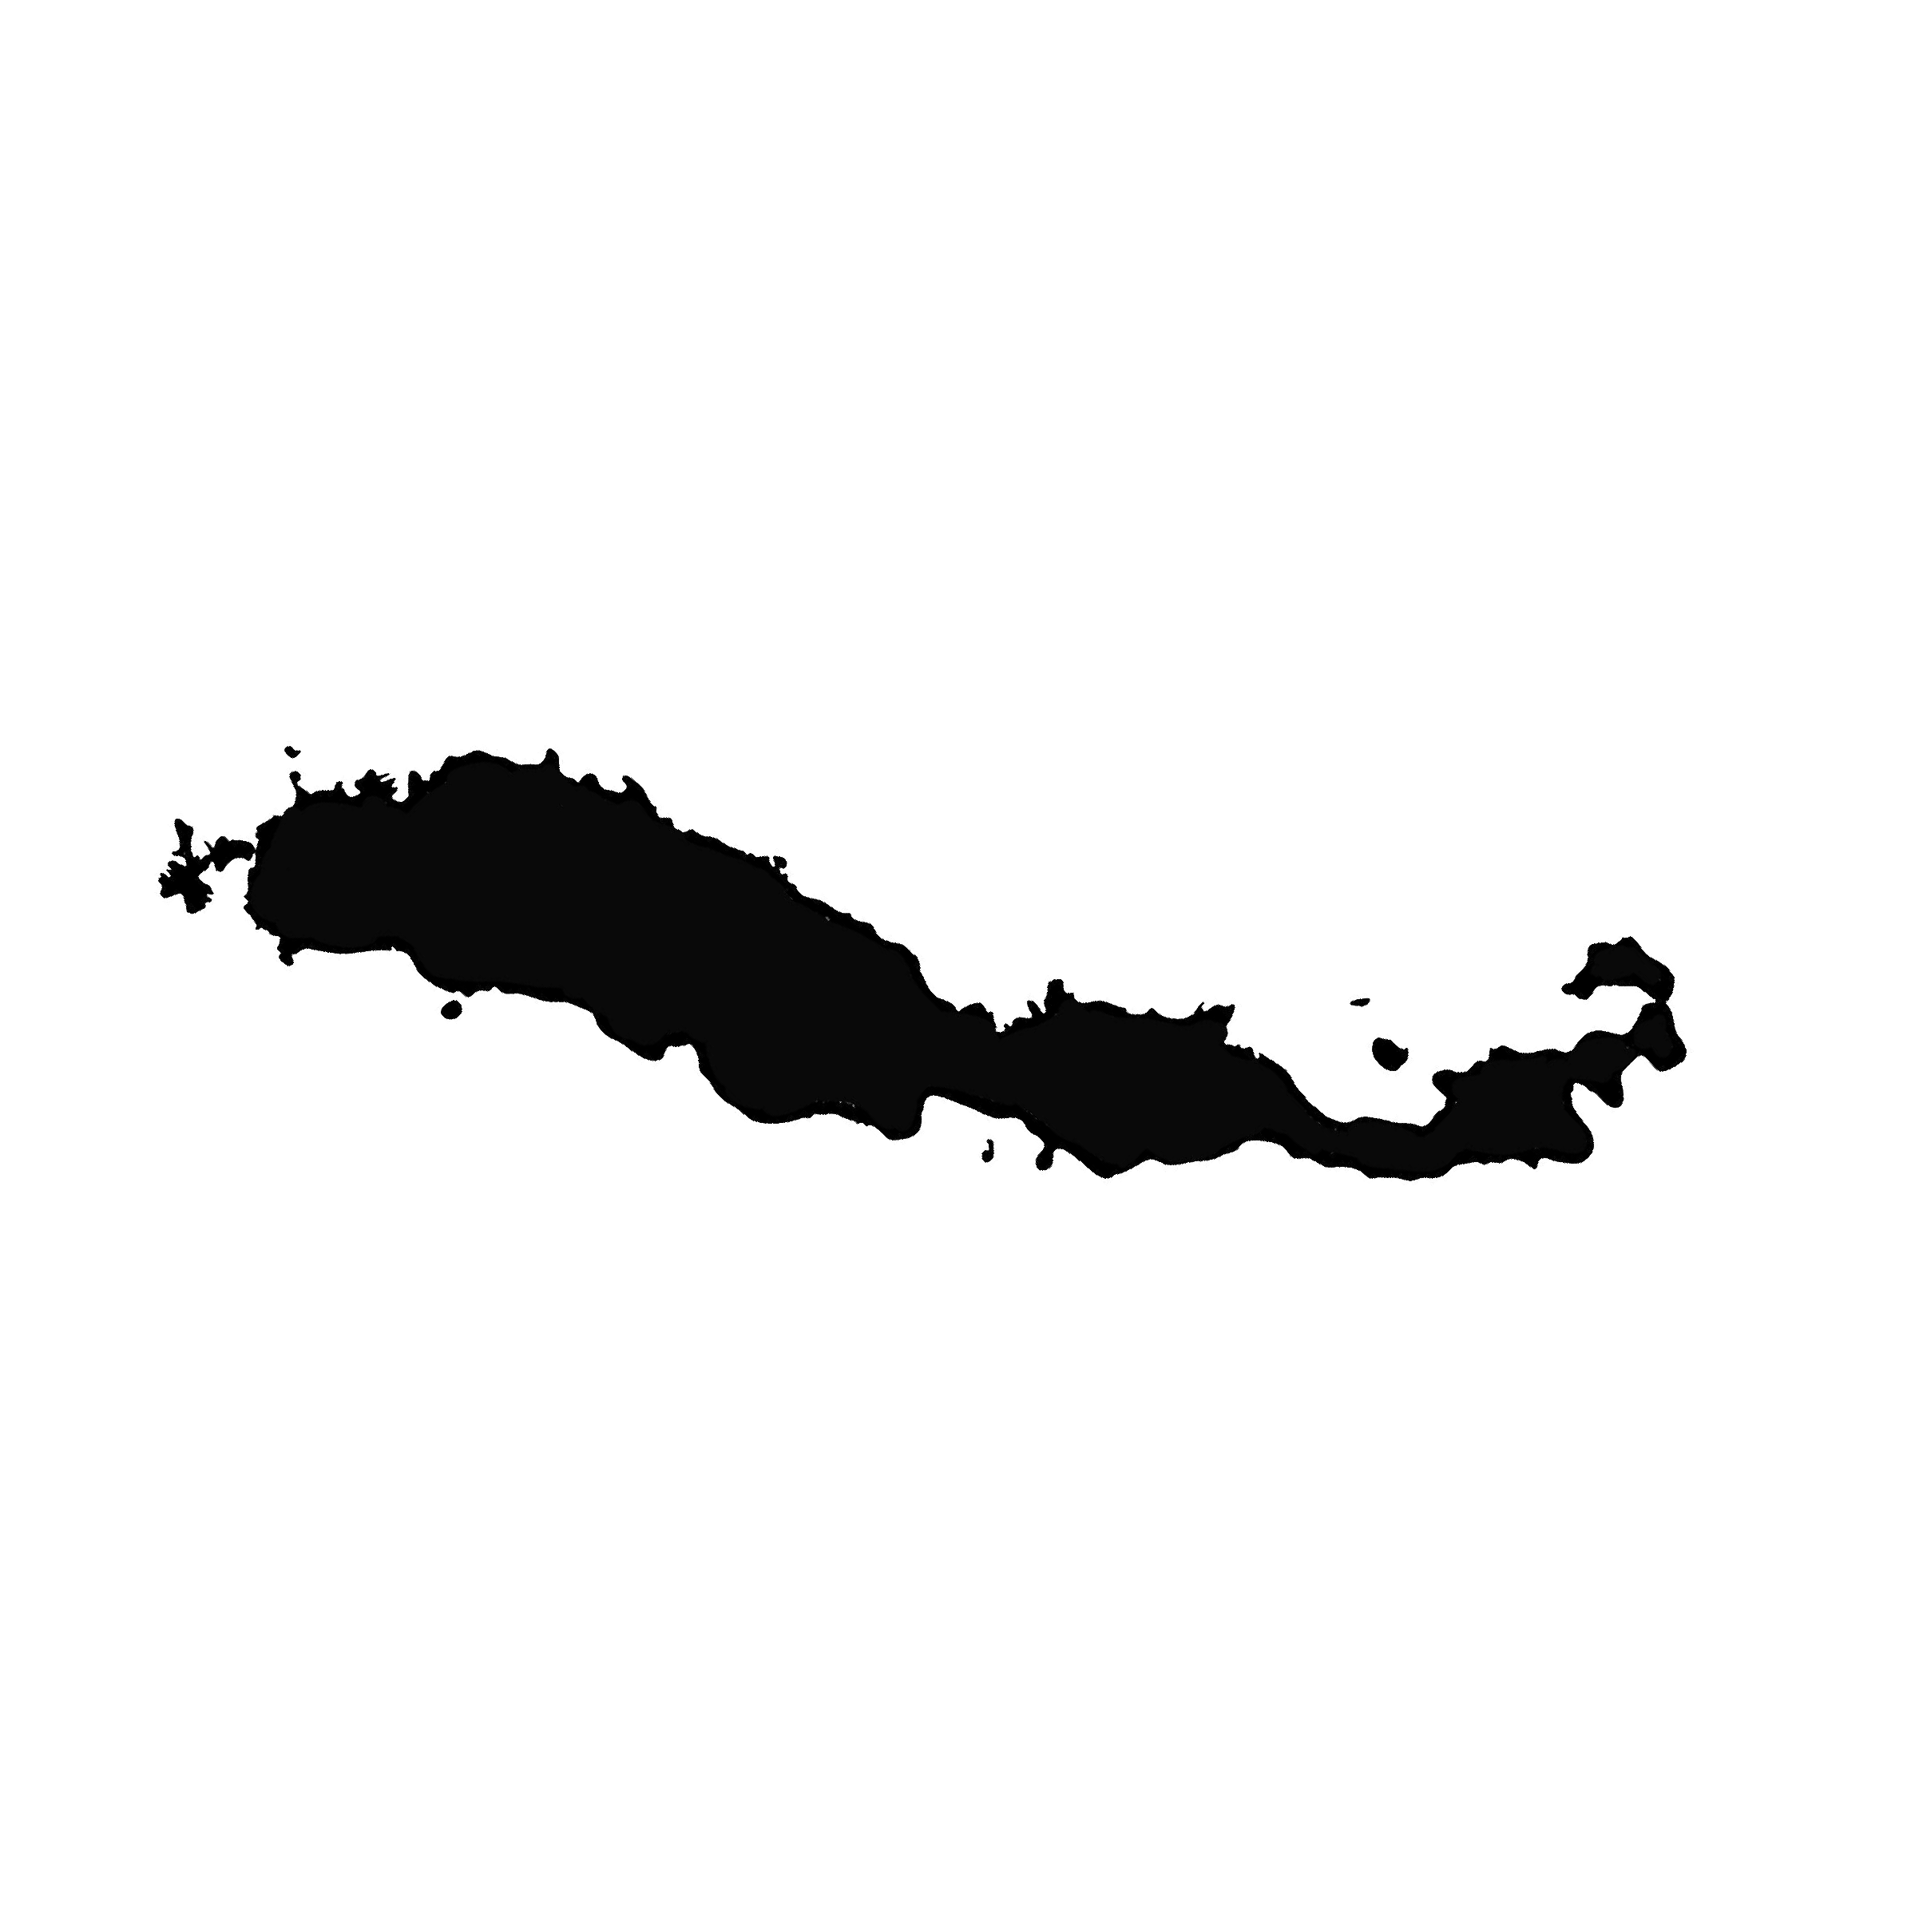

In [48]:
rotated_image = image.rotate(45, expand=True)
# image.rotate(45, expand=True, fillcolor="black")
display(rotated_image)


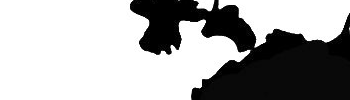

In [49]:
cropped_image = image.crop((50, 100, 400, 200))  # (x1, y1, x2, y2)

display(cropped_image) #para calcular los pixeles de la leyenda

L


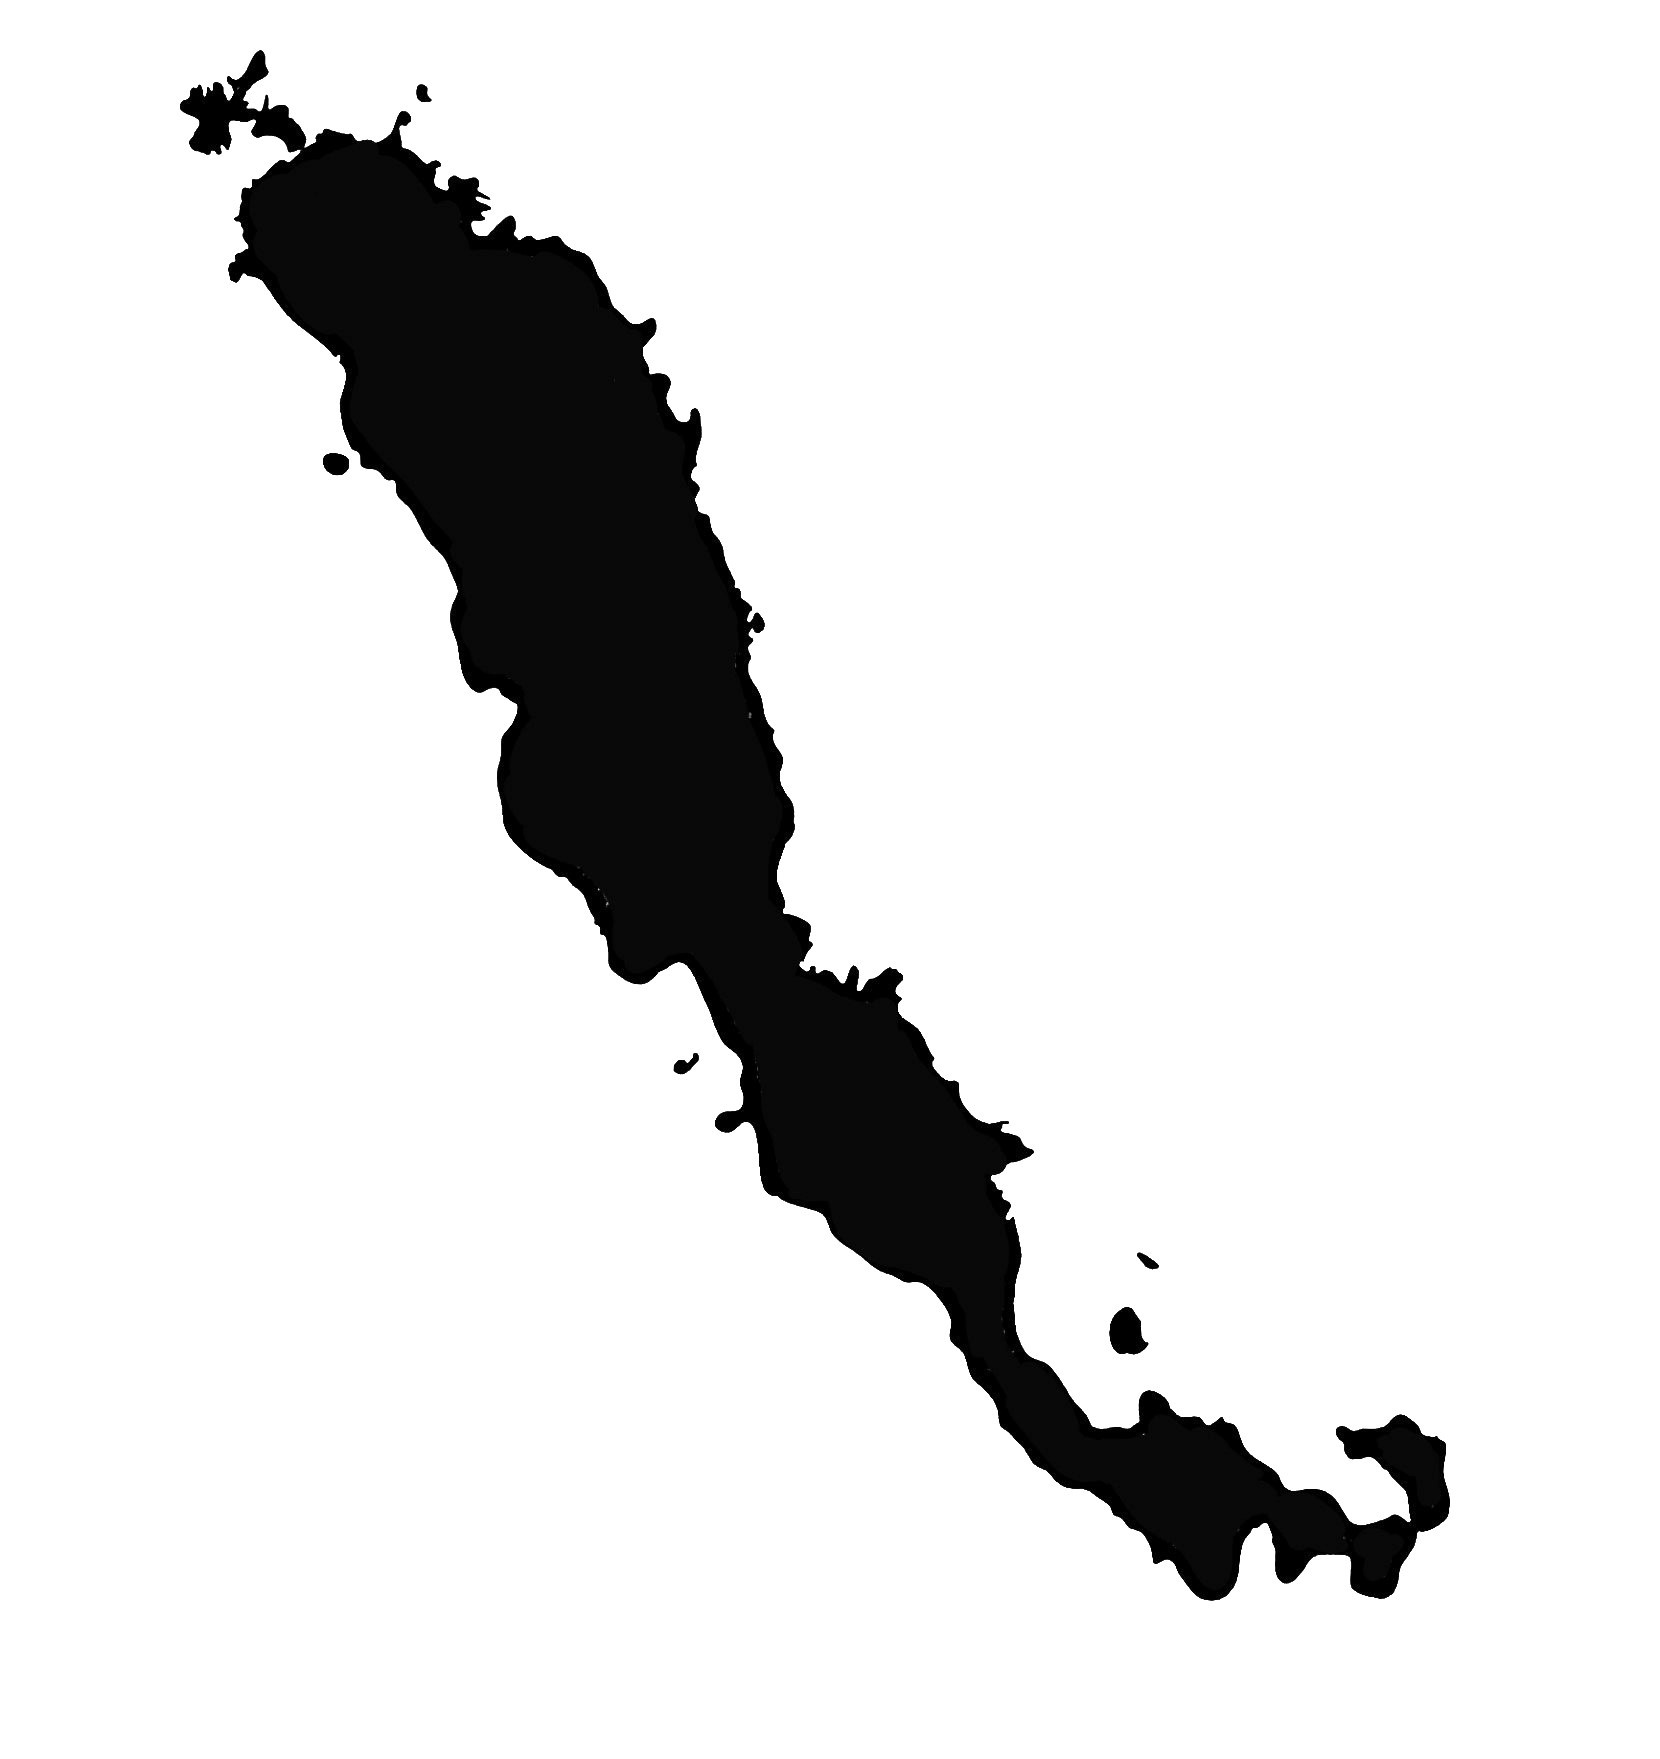

In [55]:
gray_image = image.convert("L")
print(gray_image.mode)  
display(gray_image) # ta igual
# gray_image.save("imagen_gris.jpg")


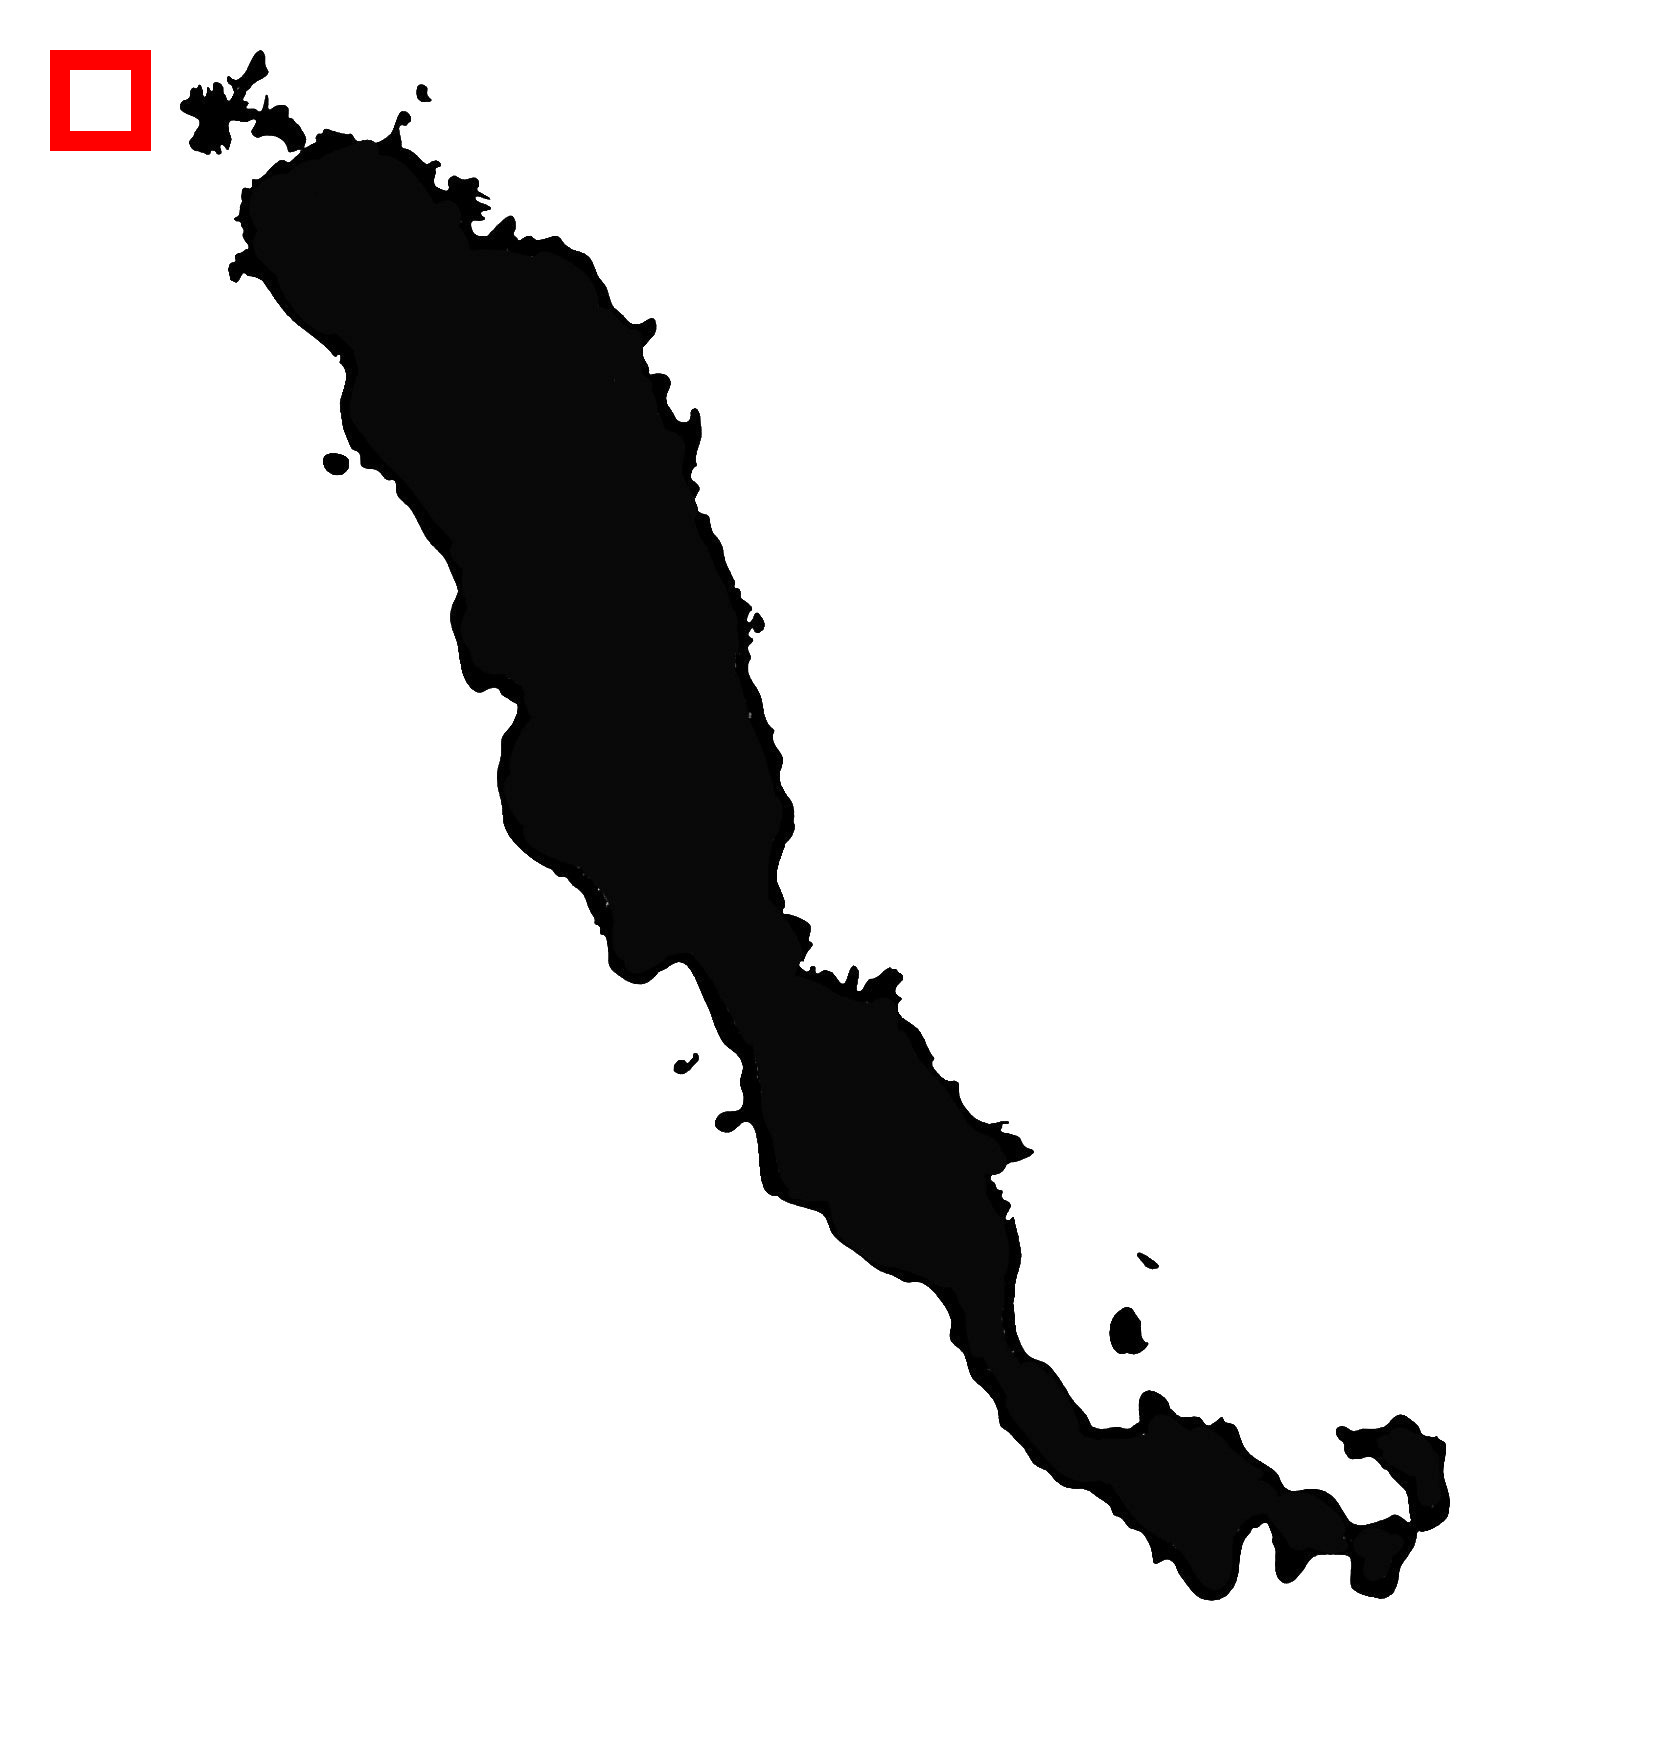

In [ ]:
image_copy = image.copy()
draw = ImageDraw.Draw(image_copy)
draw.rectangle((50, 50, 150, 150), outline="red", width=20) 
display(image_copy)


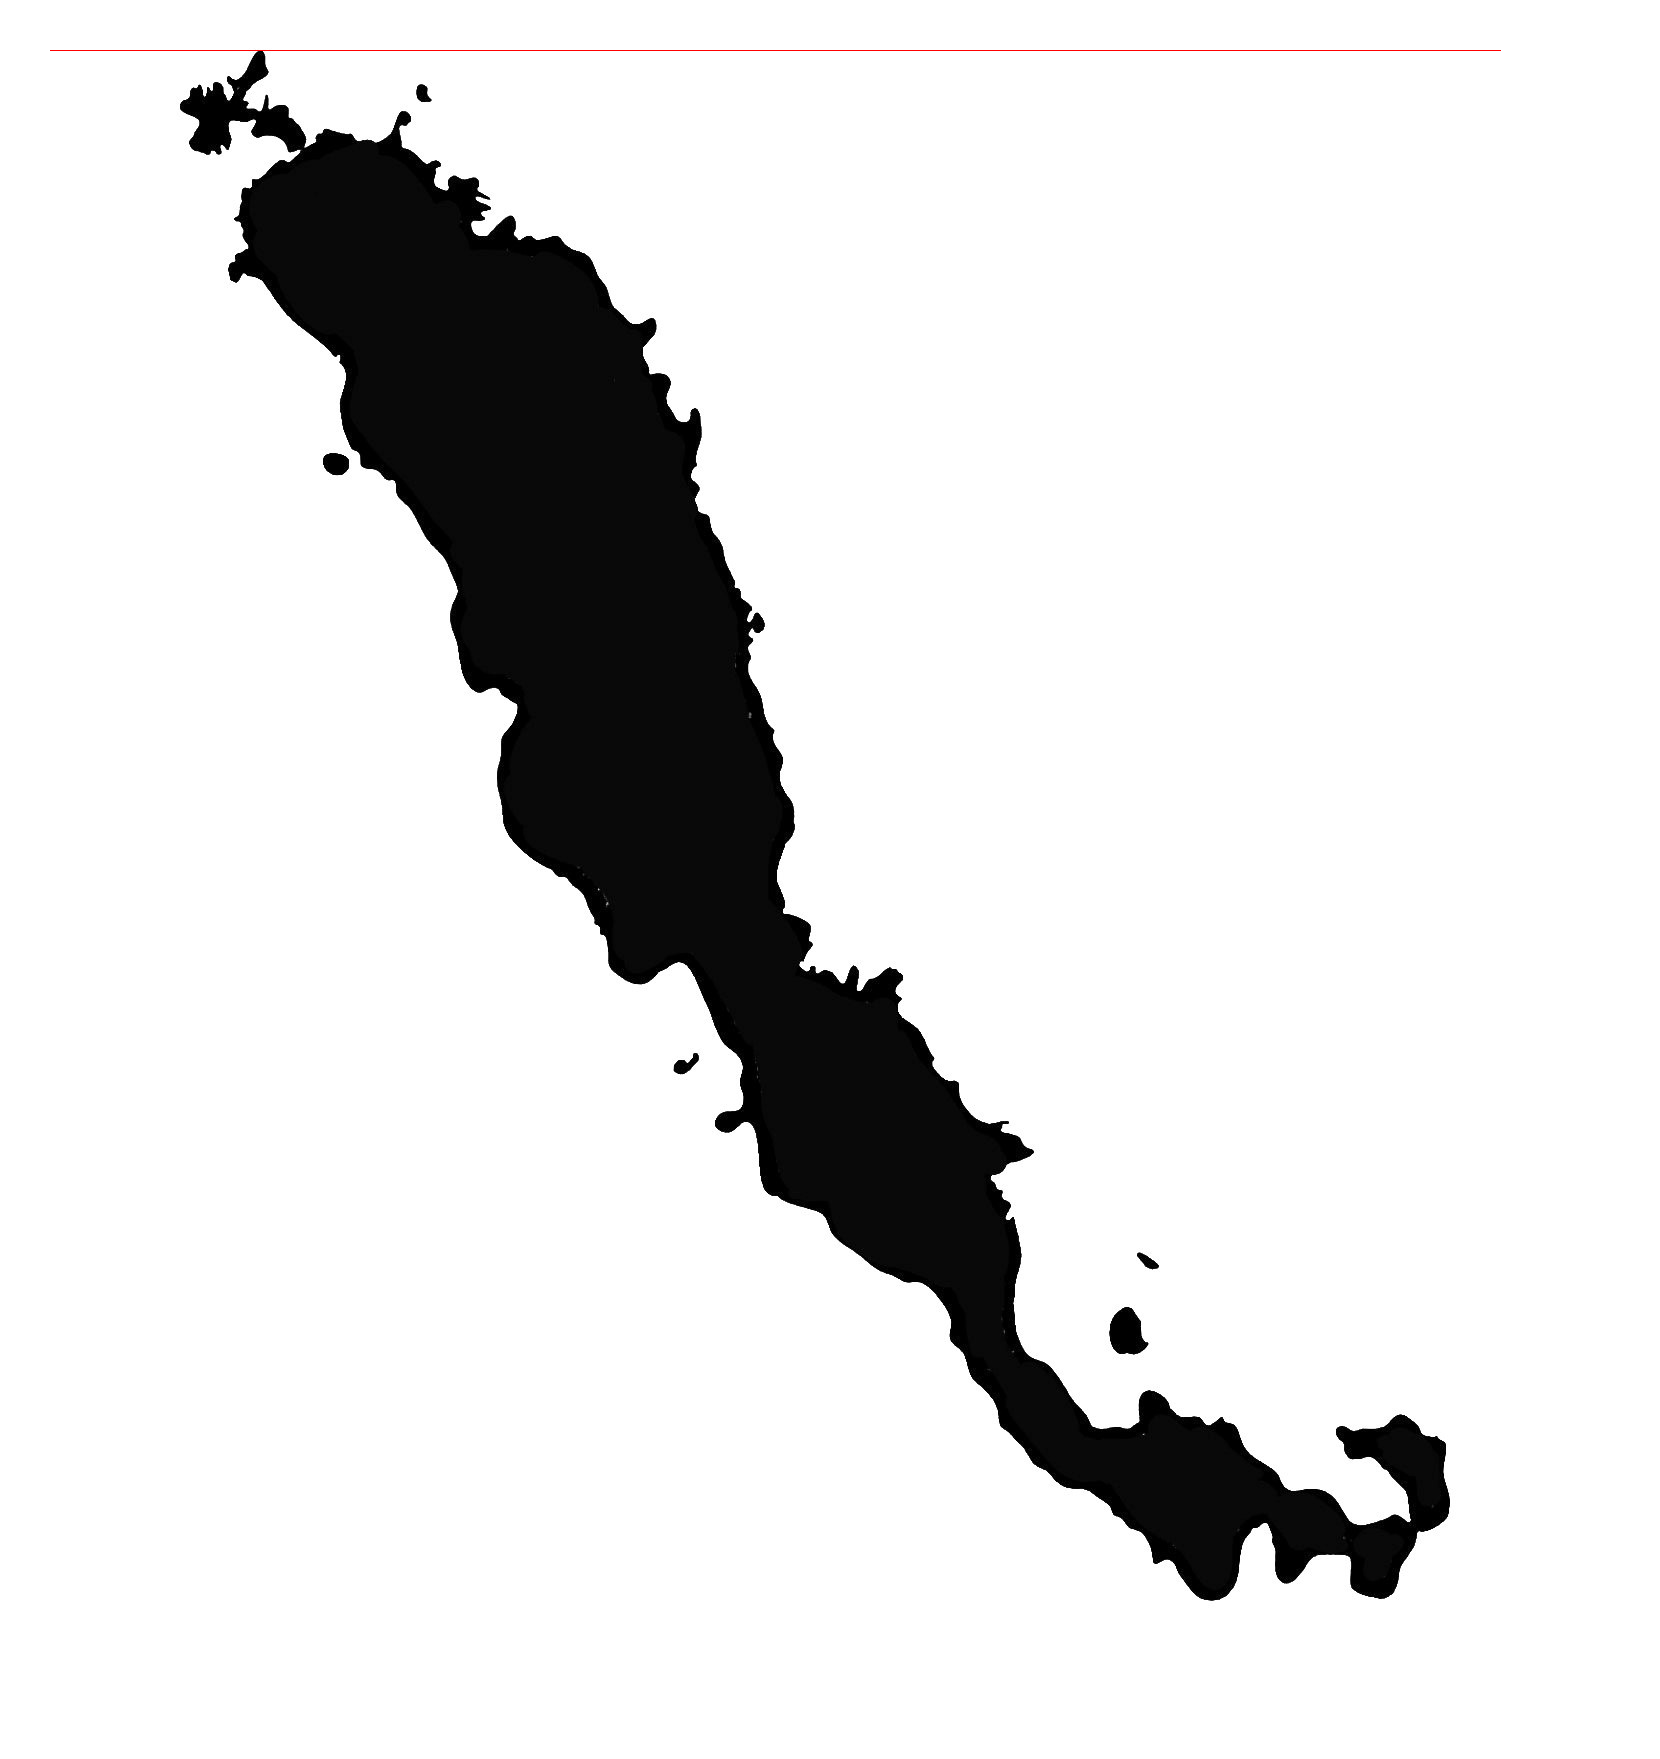

In [65]:
image_copy = image.copy()
draw = ImageDraw.Draw(image_copy)
draw.line((50, 50, 1500, 50), fill="red", width=1)
display(image_copy)

## legenda

Primero de todo utilizamos Open Computer Vision 2 para binarizar la imagen

In [68]:
imagen_leyenda = cv2.imread('mancha_con_leyenda.png', cv2.IMREAD_GRAYSCALE)
_, imagen_leyenda_binarizada = cv2.threshold(imagen_leyenda, 127, 255, cv2.THRESH_BINARY)
cv2.imwrite('imagen_leyenda_bin.png', imagen_leyenda_binarizada)

True

Ahora aplicamos la funcion number_pixels(image)

In [71]:
px_blancos, px_negros = number_pixels(imagen_leyenda_binarizada)
px_negros

38082

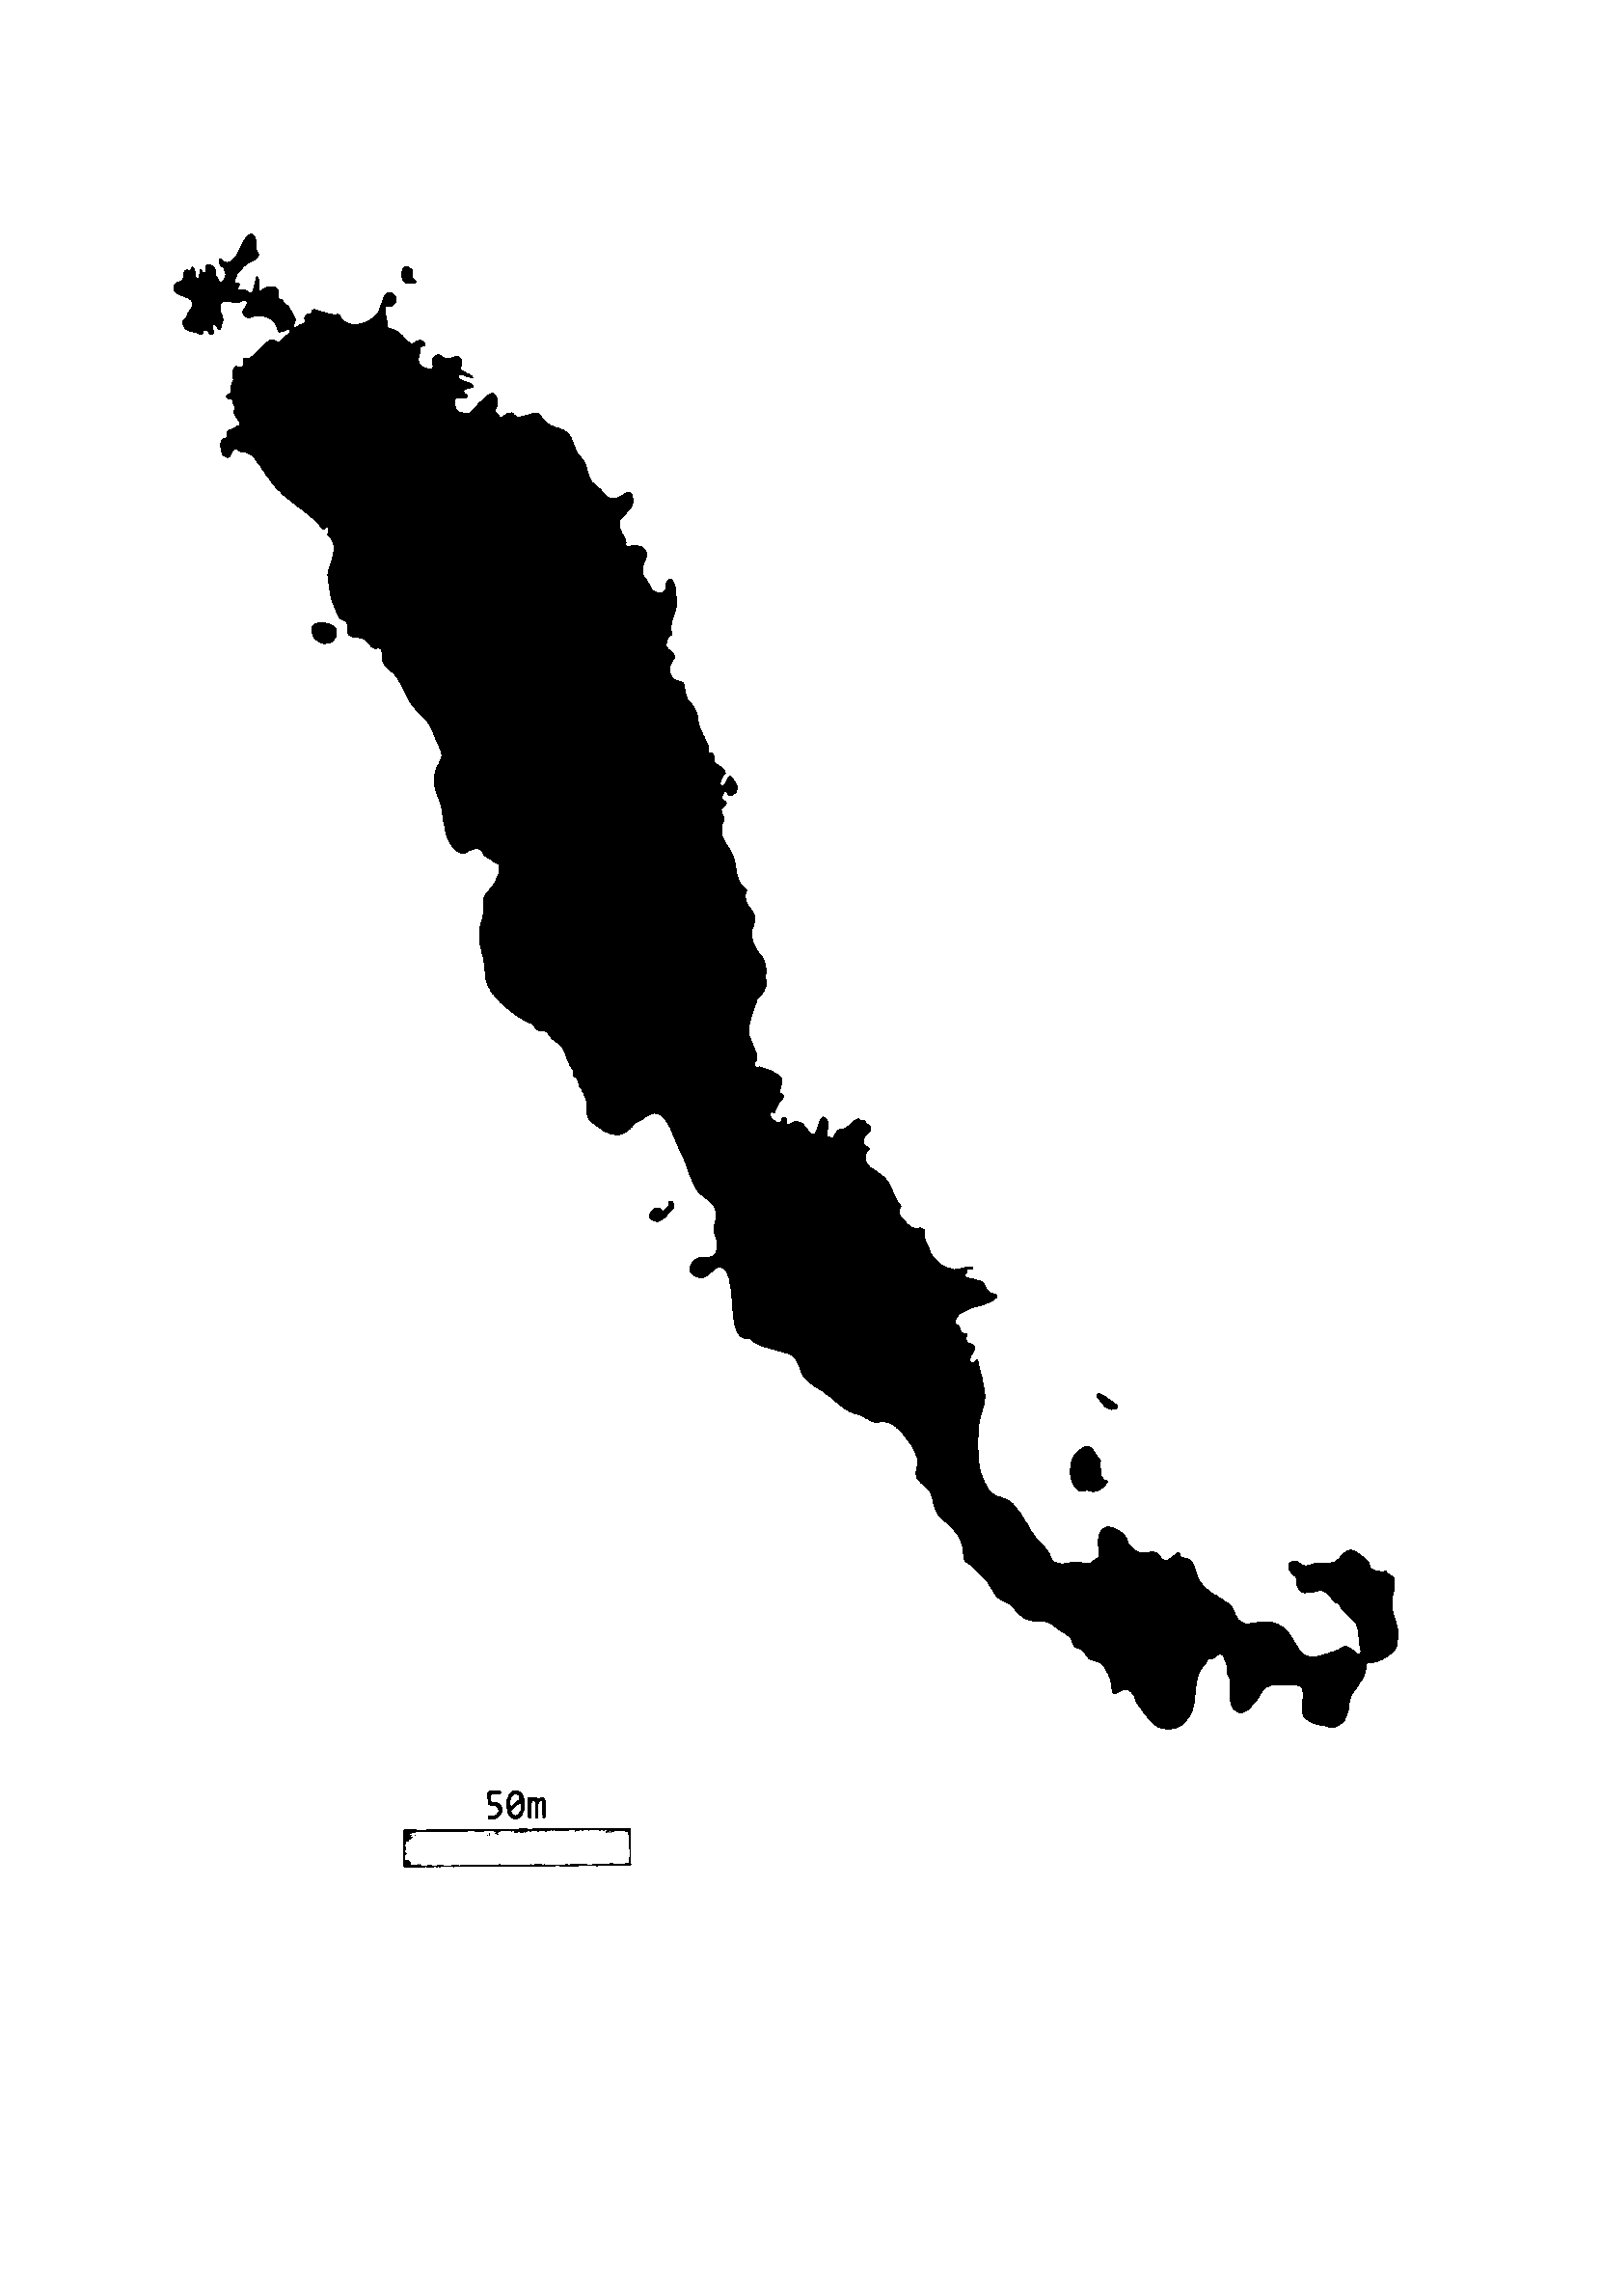

In [72]:
image = Image.open("imagen_leyenda_bin.png")
display(image)

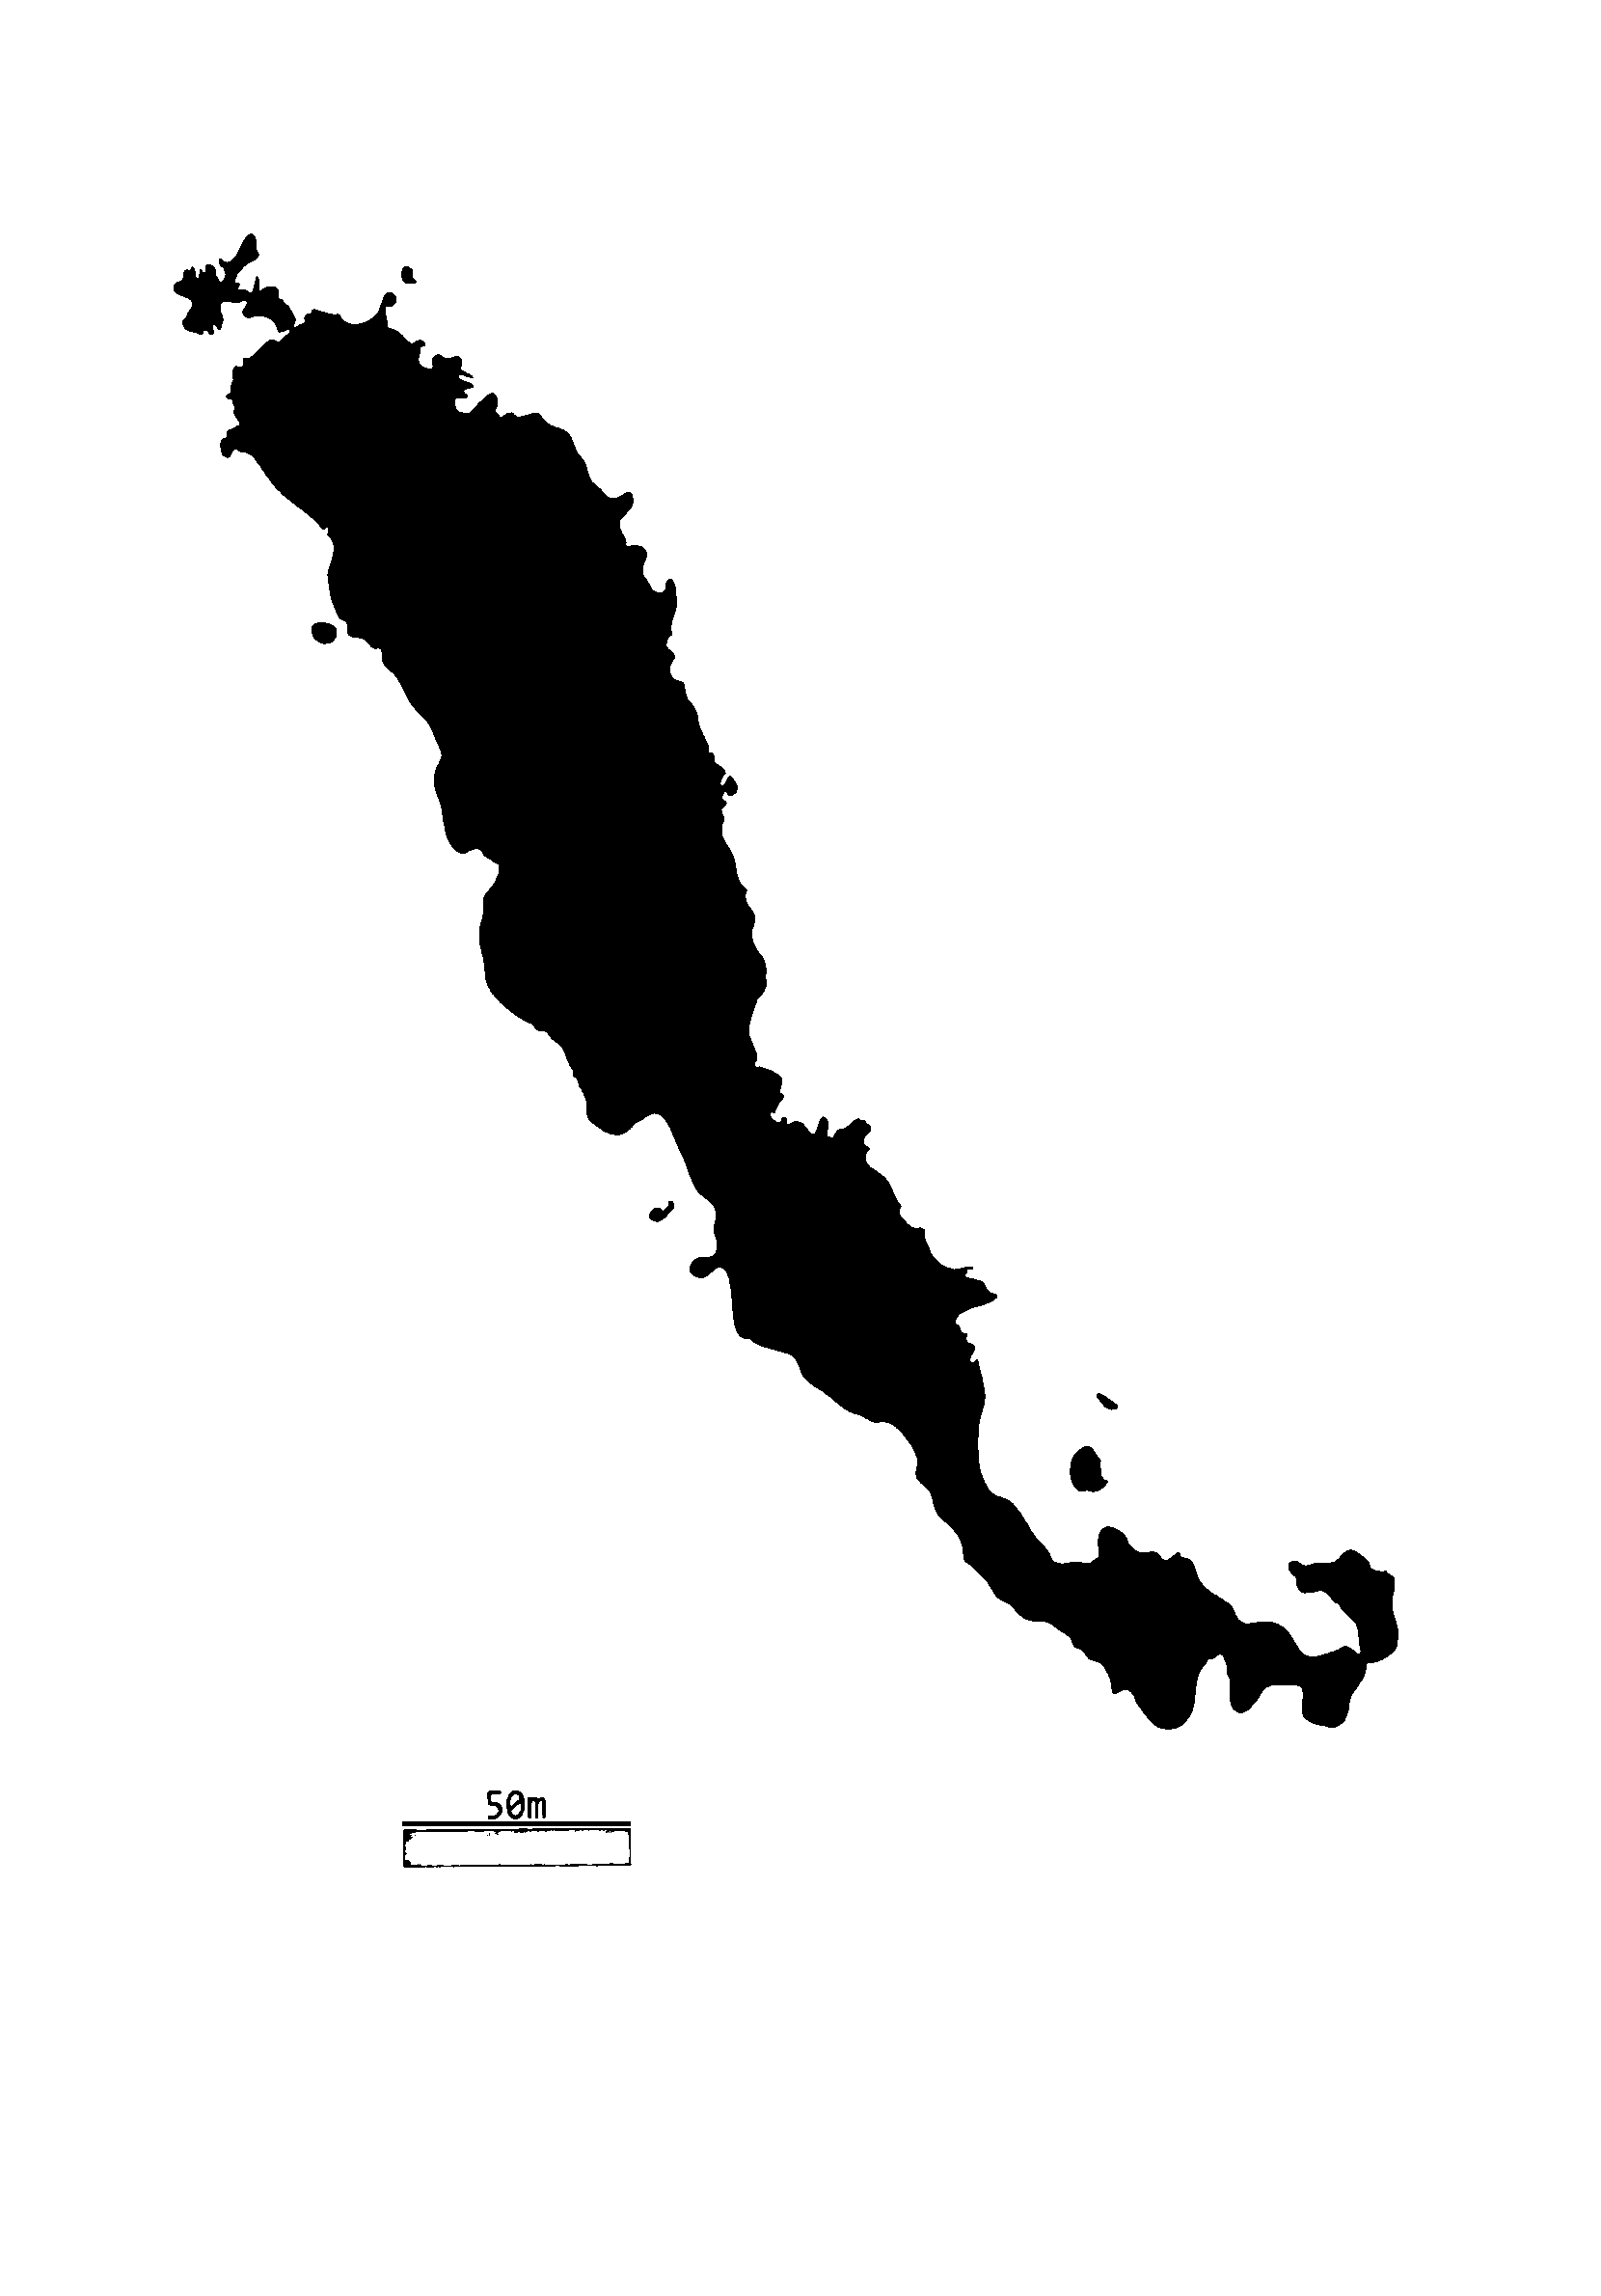

236


In [89]:
image_copy = image.copy()
draw = ImageDraw.Draw(image_copy)
draw.line((417, 1890, 653, 1890), width=5) #(x1, y1, x2, y2)
display(image_copy)
print(653 - 417)

In [91]:
def area_metros_cuadrados(num_pixeles_area, px_escala, metros_escala):
    
    resul = (num_pixeles_area / px_escala) * metros_escala
    return resul

area_metros_cuadrados(px_negros, 236, 50 )

8068.22033898305